<a href="https://colab.research.google.com/github/lakshmip04/DATASCIENCE/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/"

ValueError: mount failed

In [5]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/FDS/Proj_data.xlsx')
df

DisNo. Historic Classification Key Disaster Group  \
0    2000-0020-IND       No    nat-met-ext-col        Natural   
1    2000-0306-IND       No    nat-bio-epi-vir        Natural   
2    2000-0308-IND       No    nat-bio-epi-bac        Natural   
3    2000-0323-IND       No    nat-met-sto-tro        Natural   
4    2000-0332-IND       No    nat-hyd-flo-fla        Natural   
..             ...      ...                ...            ...   
404  2024-0399-IND       No    nat-hyd-flo-fla        Natural   
405  2024-0481-IND       No    nat-hyd-flo-flo        Natural   
406  2024-0561-IND       No    nat-hyd-flo-flo        Natural   
407  2024-0624-IND       No    nat-hyd-flo-fla        Natural   
408  2024-0627-IND       No    nat-hyd-mmw-lan        Natural   

    Disaster Subgroup        Disaster Type   Disaster Subtype  \
0      Meteorological  Extreme temperature          Cold wave   
1          Biological             Epidemic      Viral disease   
2          Biological             Epidemic  Bacterial disease   
3      Meteorological                Storm   Tropical cyclone   
4        Hydrological                Flood        Flash flood   
..                ...                  ...                ...   
404      Hydrological                Flood        Flash flood   
405      Hydrological                Flood    Flood (General)   
406      Hydrological                Flood    Flood (General)   
407      Hydrological                Flood        Flash flood   
408      Hydrological  Mass movement (wet)    Landslide (wet)   

             External IDs Event Name  ISO  ...  \
0                     NaN        NaN  IND  ...   
1                     NaN        NaN  IND  ...   
2                     NaN    Cholera  IND  ...   
3                     NaN        NaN  IND  ...   
4                     NaN        NaN  IND  ...   
..                    ...        ...  ...  ...   
404  GLIDE:FF-2024-000100        NaN  IND  ...   
405                   NaN        NaN  IND  ...   
406                   NaN        NaN  IND  ...   
407                   NaN        NaN  IND  ...   
408                   NaN        NaN  IND  ...   

    Reconstruction Costs ('000 US$) Reconstruction Costs, Adjusted ('000 US$)  \
0                               NaN                                       NaN   
1                               NaN                                       NaN   
2                               NaN                                       NaN   
3                               NaN                                       NaN   
4                               NaN                                       NaN   
..                              ...                                       ...   
404                             NaN                                       NaN   
405                             NaN                                       NaN   
406                             NaN                                       NaN   
407                             NaN                                       NaN   
408                             NaN                                       NaN   

    Insured Damage ('000 US$) Insured Damage, Adjusted ('000 US$)  \
0                         NaN                                 NaN   
1                         NaN                                 NaN   
2                         NaN                                 NaN   
3                         NaN                                 NaN   
4                         NaN                                 NaN   
..                        ...                                 ...   
404                       NaN                                 NaN   
405                       NaN                                 NaN   
406                       NaN                                 NaN   
407                       NaN                                 NaN   
408                       NaN                                 NaN   

    Total Damage ('000 US$) Total Damage, Adjus

In [3]:
missing_values = df.isnull().sum()
print(missing_values)

DisNo.                                         0
Historic                                       0
Classification Key                             0
Disaster Group                                 0
Disaster Subgroup                              0
Disaster Type                                  0
Disaster Subtype                               0
External IDs                                 351
Event Name                                   356
ISO                                            0
Country                                        0
Subregion                                      0
Region                                         0
Location                                       0
Origin                                       217
Associated Types                             292
OFDA/BHA Response                              0
Appeal                                         0
Declaration                                    0
AID Contribution ('000 US$)                  392
Magnitude           

In [4]:
# Impute numerical columns with mean
df['Magnitude'] = df['Magnitude'].fillna(df['Magnitude'].mean())
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())


In [5]:
# Drop columns where more than 50% of the values are missing
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)


In [6]:
missing_values = df.isnull().sum()
print(missing_values)

DisNo.                  0
Historic                0
Classification Key      0
Disaster Group          0
Disaster Subgroup       0
Disaster Type           0
Disaster Subtype        0
ISO                     0
Country                 0
Subregion               0
Region                  0
Location                0
OFDA/BHA Response       0
Appeal                  0
Declaration             0
Magnitude               0
Magnitude Scale        39
Latitude                0
Longitude               0
Start Year              0
Start Month             0
Start Day              46
End Year                0
End Month               2
End Day                46
Total Deaths           32
No. Affected          192
Total Affected        122
CPI                     9
Admin Units            50
Entry Date              0
Last Update             0
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DisNo.              409 non-null    object 
 1   Historic            409 non-null    object 
 2   Classification Key  409 non-null    object 
 3   Disaster Group      409 non-null    object 
 4   Disaster Subgroup   409 non-null    object 
 5   Disaster Type       409 non-null    object 
 6   Disaster Subtype    409 non-null    object 
 7   ISO                 409 non-null    object 
 8   Country             409 non-null    object 
 9   Subregion           409 non-null    object 
 10  Region              409 non-null    object 
 11  Location            409 non-null    object 
 12  OFDA/BHA Response   409 non-null    object 
 13  Appeal              409 non-null    object 
 14  Declaration         409 non-null    object 
 15  Magnitude           409 non-null    float64
 16  Magnitud

In [8]:

# Fill Start Day with 1 (assuming start of month if day is missing)
df['Start Day'] = df['Start Day'].fillna(1)

# Fill End Month with Start Month if missing
df['End Month'] = df['End Month'].fillna(df['Start Month'])

# Fill End Day
# If End Month == Start Month, use Start Day
# Otherwise, use last day of the month (28 as a conservative estimate)
df['End Day'] = df.apply(lambda row: row['Start Day'] if row['End Month'] == row['Start Month']
                         else 28 if pd.isnull(row['End Day']) else row['End Day'], axis=1)

# Fill remaining categorical columns with mode
categorical_columns = ['Magnitude Scale', 'Entry Date', 'Admin Units']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify that all null values are filled
print(df.isnull().sum())


DisNo.                  0
Historic                0
Classification Key      0
Disaster Group          0
Disaster Subgroup       0
Disaster Type           0
Disaster Subtype        0
ISO                     0
Country                 0
Subregion               0
Region                  0
Location                0
OFDA/BHA Response       0
Appeal                  0
Declaration             0
Magnitude               0
Magnitude Scale         0
Latitude                0
Longitude               0
Start Year              0
Start Month             0
Start Day               0
End Year                0
End Month               0
End Day                 0
Total Deaths           32
No. Affected          192
Total Affected        122
CPI                     9
Admin Units             0
Entry Date              0
Last Update             0
dtype: int64


<ipython-input-8-0561f547ac9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start Day'] = df['Start Day'].fillna(1)
<ipython-input-8-0561f547ac9f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['End Month'] = df['End Month'].fillna(df['Start Month'])
<ipython-input-8-0561f547ac9f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [9]:
# Fill remaining numerical columns with mean
df['Total Deaths'] = df['Total Deaths'].fillna(df['Total Deaths'].mean())
df['No. Affected'] = df['No. Affected'].fillna(df['No. Affected'].mean())
df['Total Affected'] = df['Total Affected'].fillna(df['Total Affected'].mean())
df['CPI'] = df['CPI'].fillna(df['CPI'].mean())

# Verify that all null values are filled
print(df.isnull().sum())

DisNo.                0
Historic              0
Classification Key    0
Disaster Group        0
Disaster Subgroup     0
Disaster Type         0
Disaster Subtype      0
ISO                   0
Country               0
Subregion             0
Region                0
Location              0
OFDA/BHA Response     0
Appeal                0
Declaration           0
Magnitude             0
Magnitude Scale       0
Latitude              0
Longitude             0
Start Year            0
Start Month           0
Start Day             0
End Year              0
End Month             0
End Day               0
Total Deaths          0
No. Affected          0
Total Affected        0
CPI                   0
Admin Units           0
Entry Date            0
Last Update           0
dtype: int64


<ipython-input-9-90cde5c4b1c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Deaths'] = df['Total Deaths'].fillna(df['Total Deaths'].mean())
<ipython-input-9-90cde5c4b1c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No. Affected'] = df['No. Affected'].fillna(df['No. Affected'].mean())
<ipython-input-9-90cde5c4b1c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

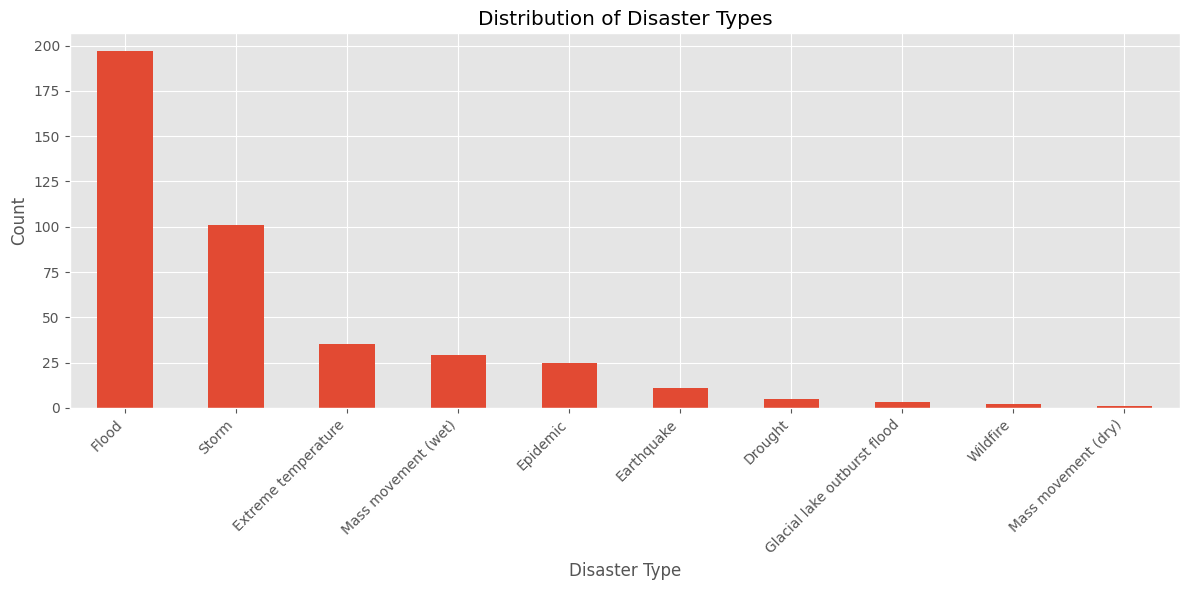

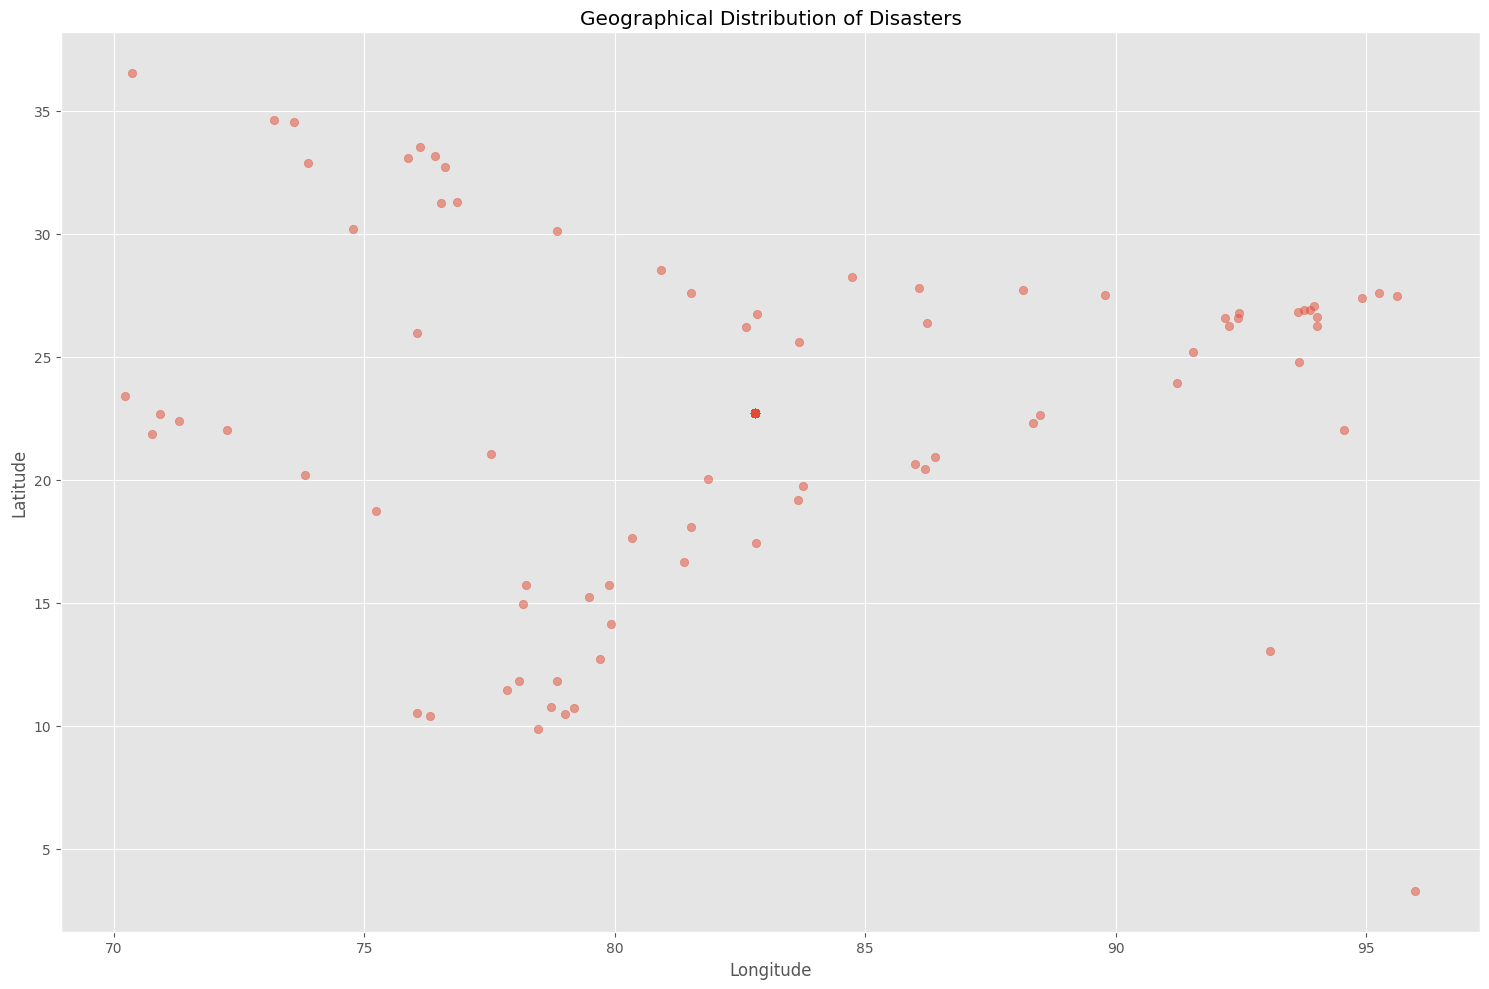

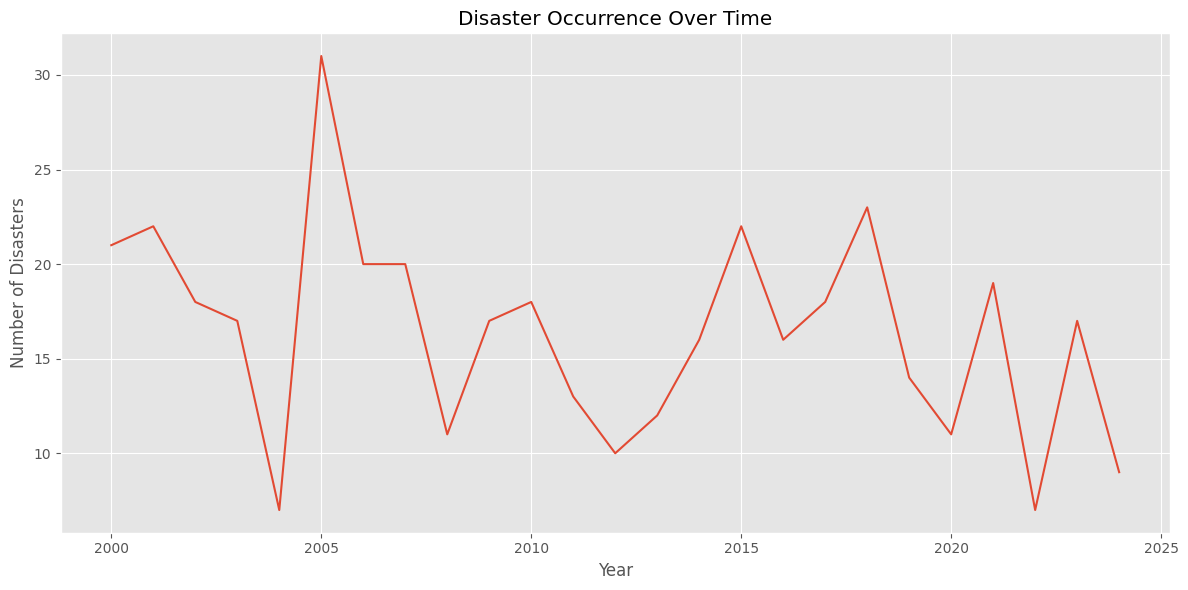

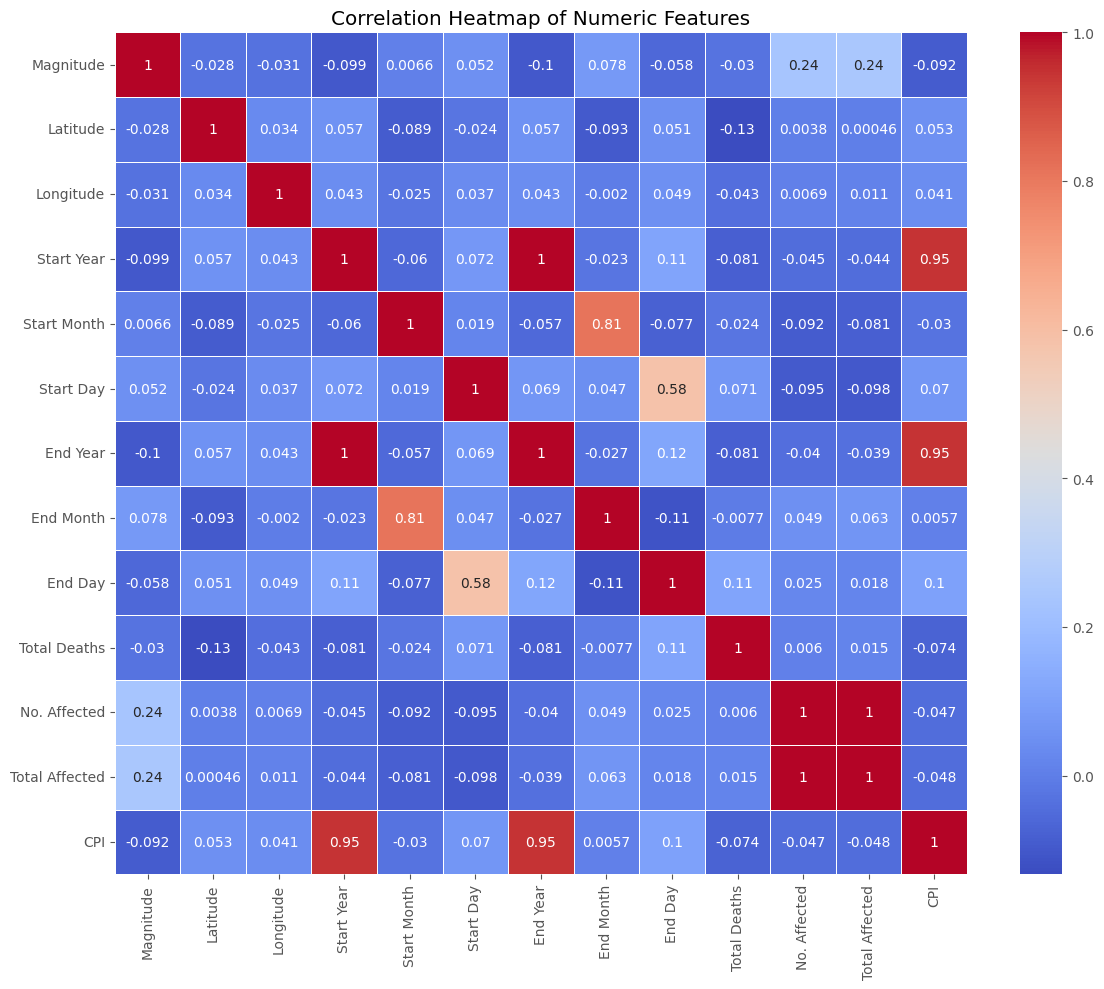

<Figure size 1500x800 with 0 Axes>

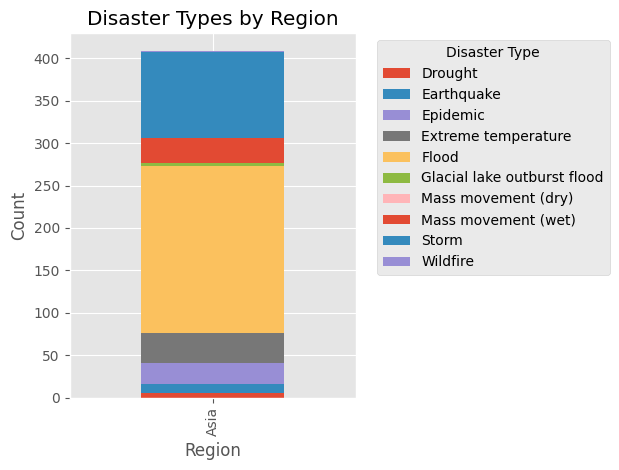

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
plt.style.use('ggplot')  # Using 'ggplot' style instead of 'seaborn'

# 1. Distribution of Disaster Types
plt.figure(figsize=(12, 6))
df['Disaster Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Disaster Types')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Geographical Distribution of Disasters
plt.figure(figsize=(15, 10))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5)
plt.title('Geographical Distribution of Disasters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

# 3. Disaster Occurrence Over Time
plt.figure(figsize=(12, 6))
df['Start Year'].value_counts().sort_index().plot(kind='line')
plt.title('Disaster Occurrence Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.tight_layout()
plt.show()

# 4. Correlation Heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

# 5. Disaster Types by Region
plt.figure(figsize=(15, 8))
df.groupby('Region')['Disaster Type'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Disaster Types by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-11-5ea59250de5a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Disaster Type'] = le.fit_transform(df['Disaster Type'])


Correlation with target variable:
Start Year        0.236094
End Year          0.232077
CPI               0.225281
Start Day         0.140898
End Day           0.023028
Longitude        -0.007646
Latitude         -0.047241
Start Month      -0.079840
End Month        -0.114086
Magnitude        -0.118643
No. Affected     -0.152865
Total Deaths     -0.163413
Total Affected   -0.167954
dtype: float64


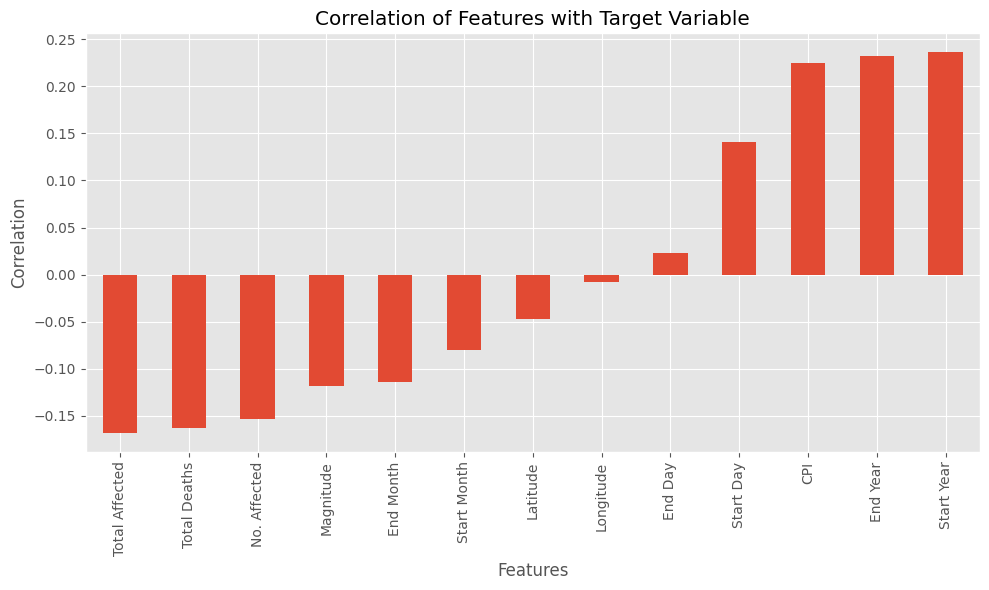


Feature Importance from Random Forest:
Magnitude         0.133229
End Month         0.131547
Start Month       0.112047
Total Deaths      0.094408
Total Affected    0.083329
No. Affected      0.075712
Start Day         0.075700
Start Year        0.063916
End Year          0.059502
CPI               0.059000
End Day           0.056266
Longitude         0.028038
Latitude          0.027306
dtype: float64


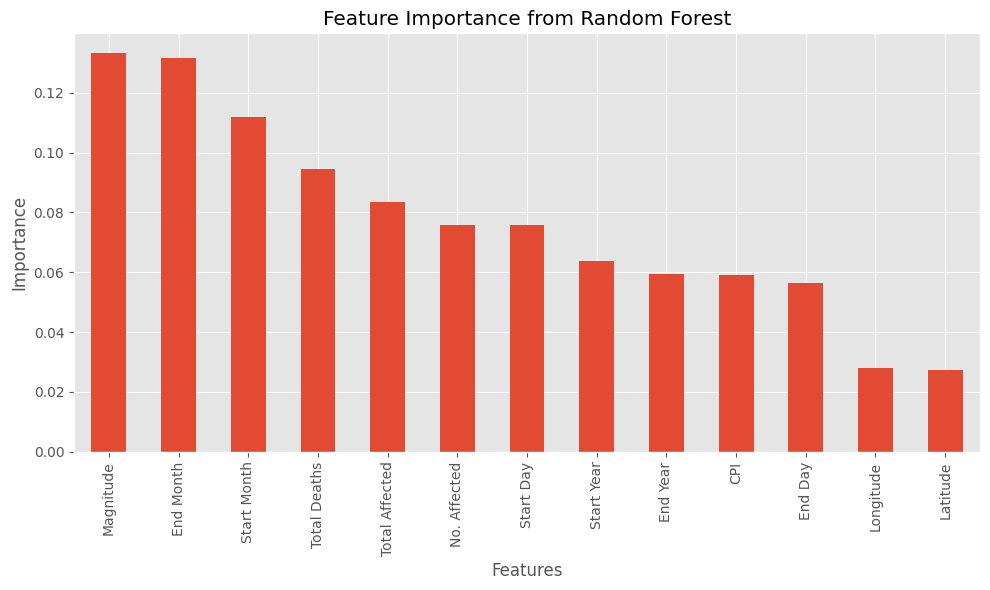


ANOVA F-scores:
Total Affected    36.070103
No. Affected      35.659153
Total Deaths       8.846283
End Month          7.946599
Magnitude          7.276664
Start Year         5.786287
CPI                5.740717
End Year           5.720968
Start Day          5.432196
Start Month        3.541631
End Day            0.965028
Latitude           0.940457
Longitude          0.234189
dtype: float64

Mutual Information scores:
Magnitude         0.568359
Start Month       0.323322
End Month         0.303762
Total Affected    0.261524
No. Affected      0.256973
Longitude         0.216536
Latitude          0.185854
Start Day         0.131240
CPI               0.127118
Total Deaths      0.099880
End Day           0.078464
End Year          0.076432
Start Year        0.066420
dtype: float64


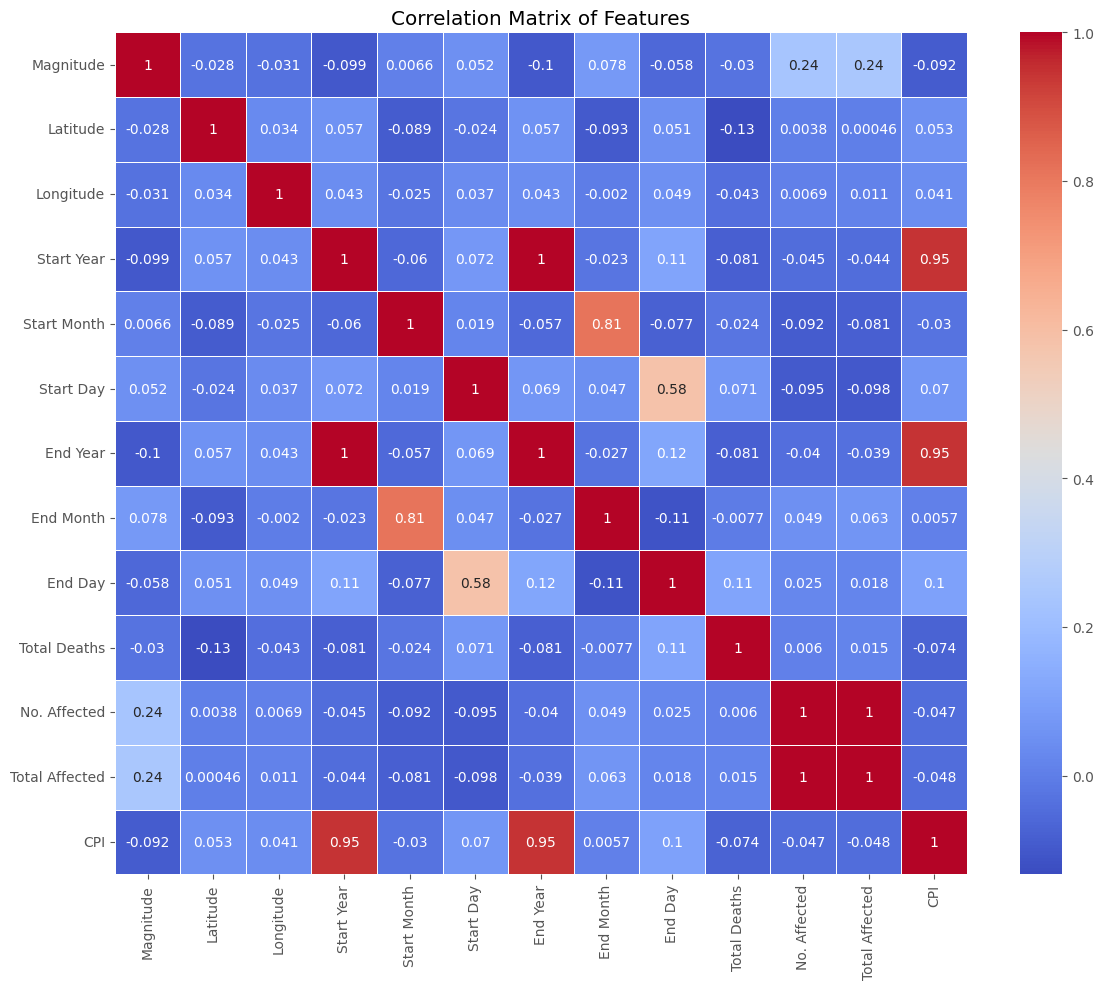


Top 5 features based on correlation: ['Start Year', 'End Year', 'CPI', 'Total Affected', 'Total Deaths']
Top 5 features based on Random Forest: ['Magnitude', 'End Month', 'Start Month', 'Total Deaths', 'Total Affected']
Top 5 features based on ANOVA F-score: ['Total Affected', 'No. Affected', 'Total Deaths', 'End Month', 'Magnitude']
Top 5 features based on Mutual Information: ['Magnitude', 'Start Month', 'End Month', 'Total Affected', 'No. Affected']

Combined unique top features: ['CPI', 'Total Deaths', 'Magnitude', 'No. Affected', 'End Year', 'End Month', 'Total Affected', 'Start Month', 'Start Year']

Final selected features: ['CPI', 'Total Deaths', 'Magnitude', 'No. Affected', 'End Year', 'End Month', 'Total Affected', 'Start Month', 'Start Year']


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
# If 'Disaster Type' is your target variable, encode it
le = LabelEncoder()
df['Disaster Type'] = le.fit_transform(df['Disaster Type'])

# Select numeric columns
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('Disaster Type')  # Remove target variable if it's numeric

X = df[numeric_features]
y = df['Disaster Type']

# 1. Correlation with target variable
correlation_with_target = X.apply(lambda x: x.corr(y))
print("Correlation with target variable:")
print(correlation_with_target.sort_values(ascending=False))

# Visualize correlation with target
plt.figure(figsize=(10, 6))
correlation_with_target.sort_values().plot(kind='bar')
plt.title('Correlation of Features with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

# 2. Feature importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance from Random Forest:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# 3. Univariate feature selection
# Using f_classif (ANOVA F-value)
selector_f = SelectKBest(f_classif, k='all')
selector_f.fit(X, y)
f_scores = pd.Series(selector_f.scores_, index=X.columns).sort_values(ascending=False)
print("\nANOVA F-scores:")
print(f_scores)

# Using mutual_info_classif
selector_mi = SelectKBest(mutual_info_classif, k='all')
selector_mi.fit(X, y)
mi_scores = pd.Series(selector_mi.scores_, index=X.columns).sort_values(ascending=False)
print("\nMutual Information scores:")
print(mi_scores)

# 4. Correlation matrix of features
correlation_matrix = X.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

# 5. Select top features based on different methods
top_corr = correlation_with_target.abs().sort_values(ascending=False).head(5).index.tolist()
top_rf = feature_importance.head(5).index.tolist()
top_f = f_scores.head(5).index.tolist()
top_mi = mi_scores.head(5).index.tolist()

print("\nTop 5 features based on correlation:", top_corr)
print("Top 5 features based on Random Forest:", top_rf)
print("Top 5 features based on ANOVA F-score:", top_f)
print("Top 5 features based on Mutual Information:", top_mi)

# 6. Combine and get unique features
all_top_features = list(set(top_corr + top_rf + top_f + top_mi))
print("\nCombined unique top features:", all_top_features)

# 7. Final feature selection
# You can choose to use all_top_features or select based on your domain knowledge
selected_features = all_top_features

print("\nFinal selected features:", selected_features)

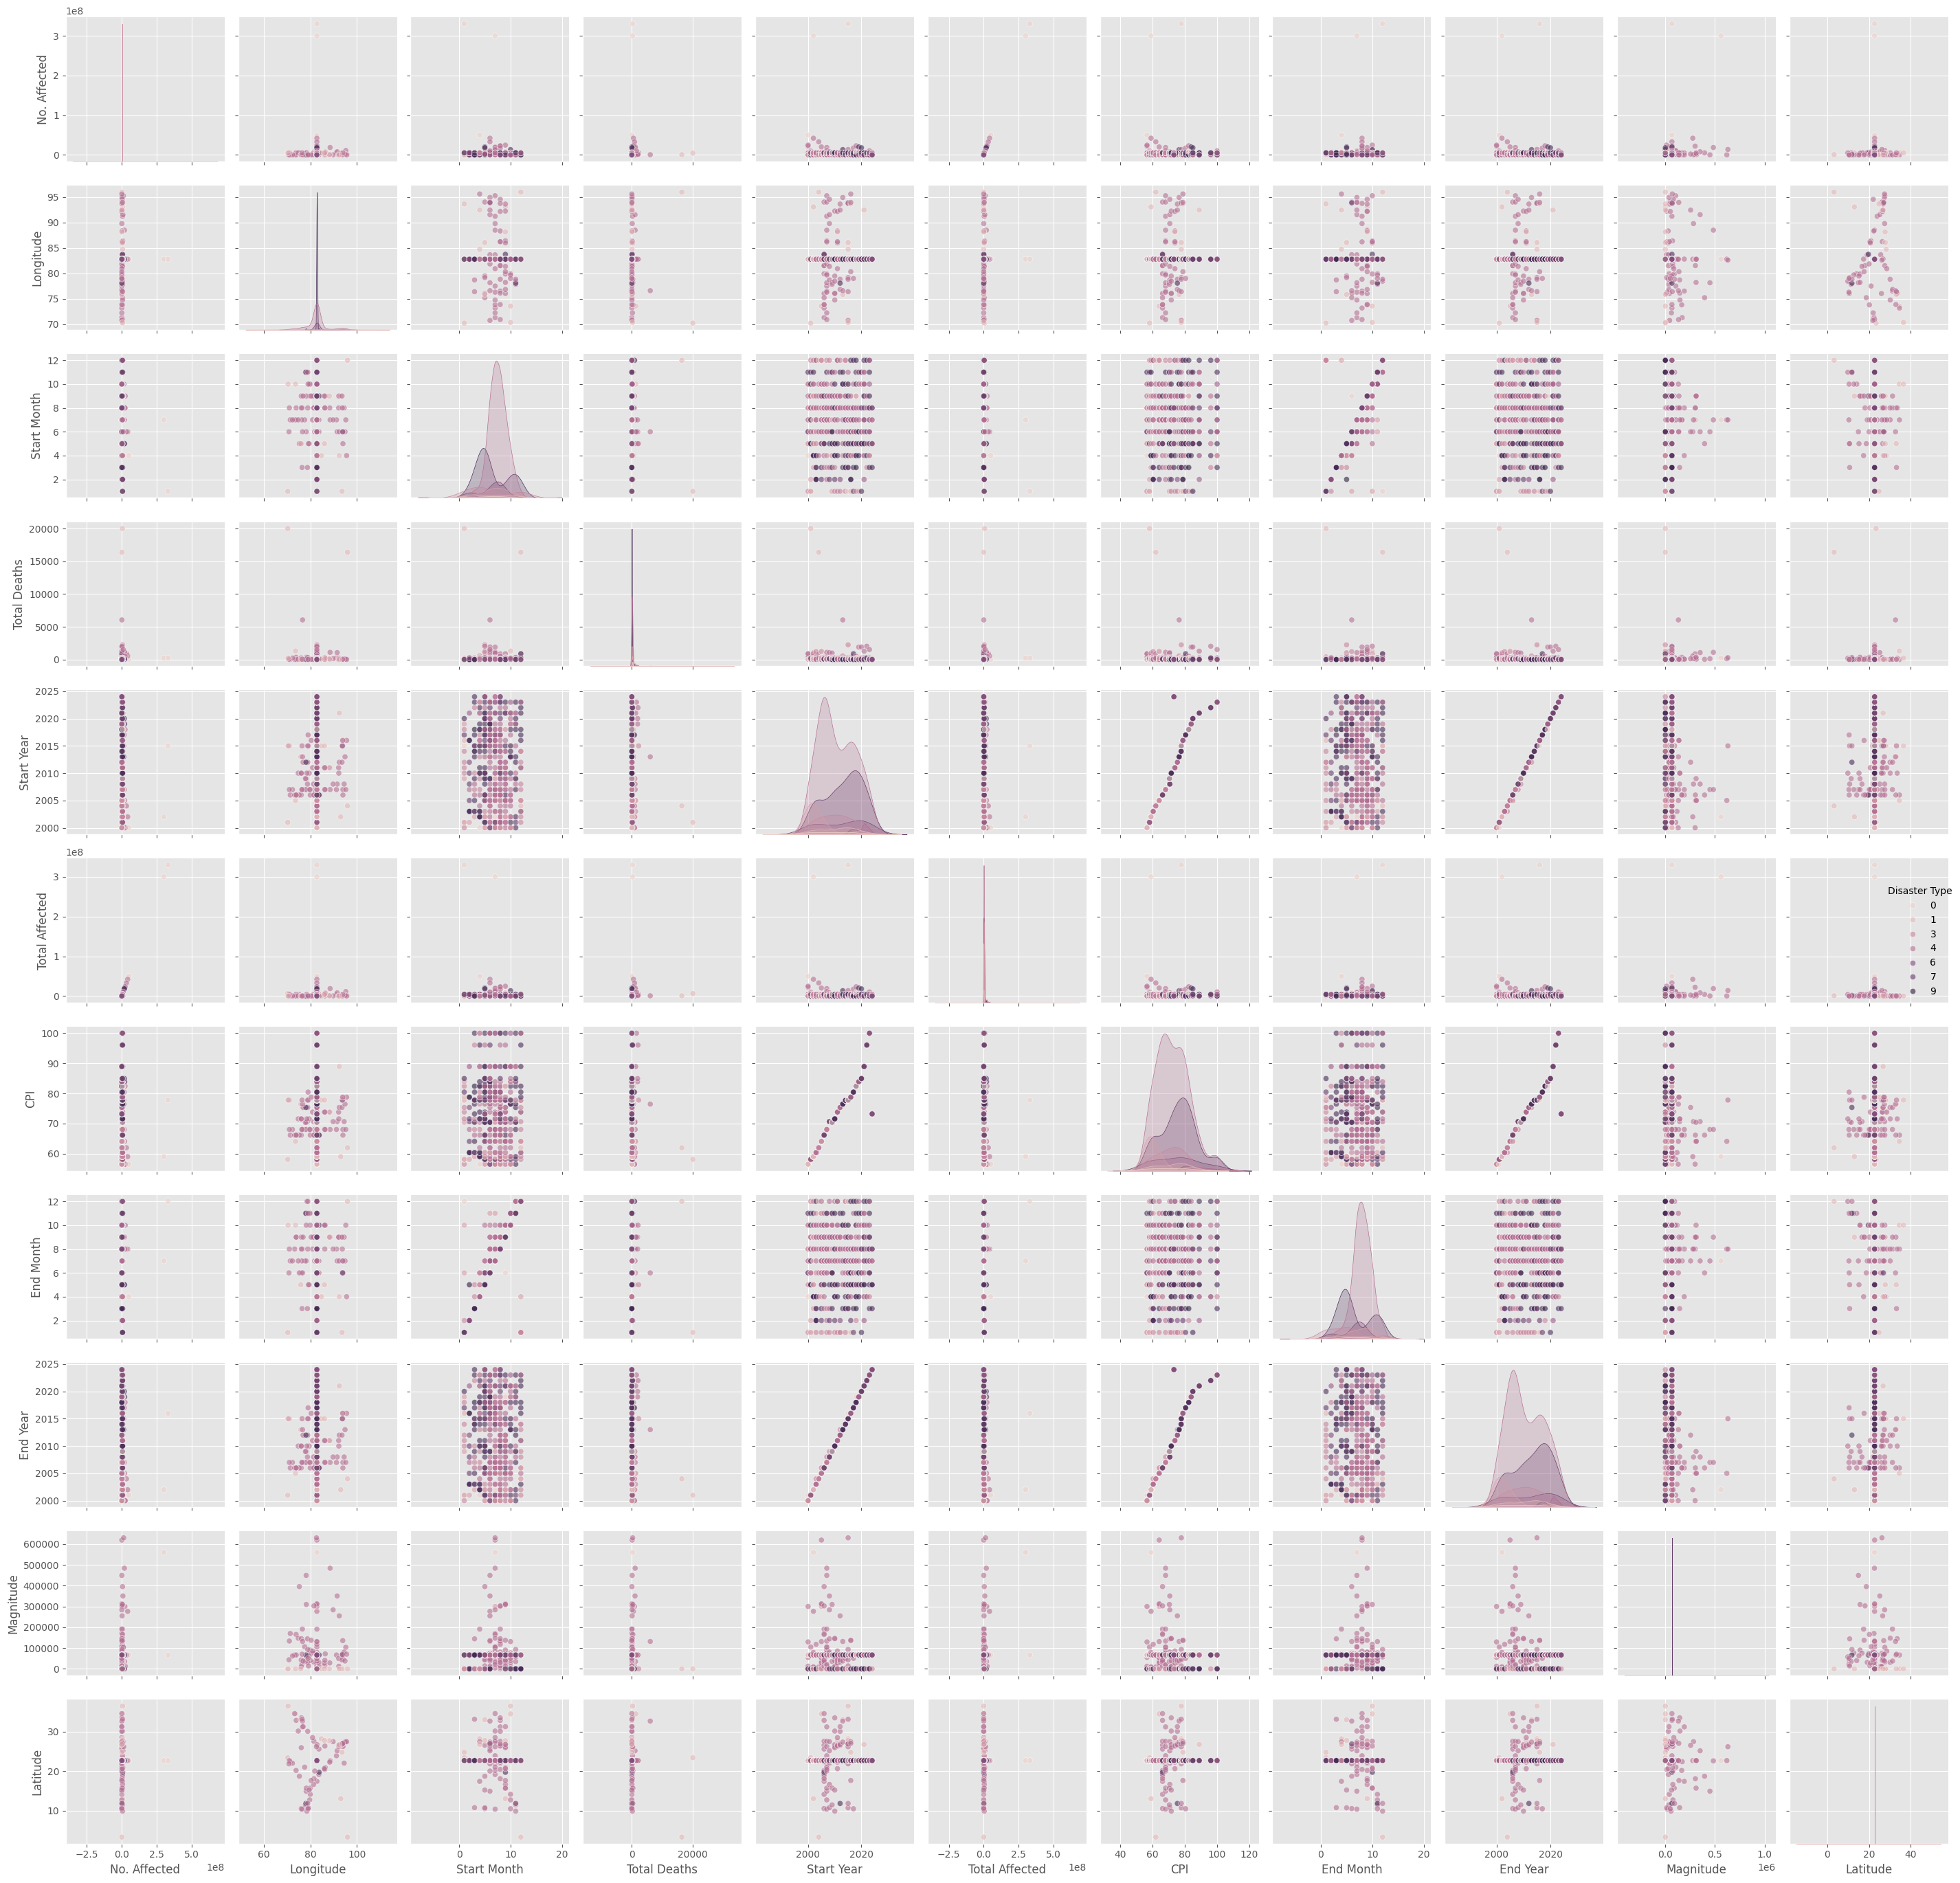

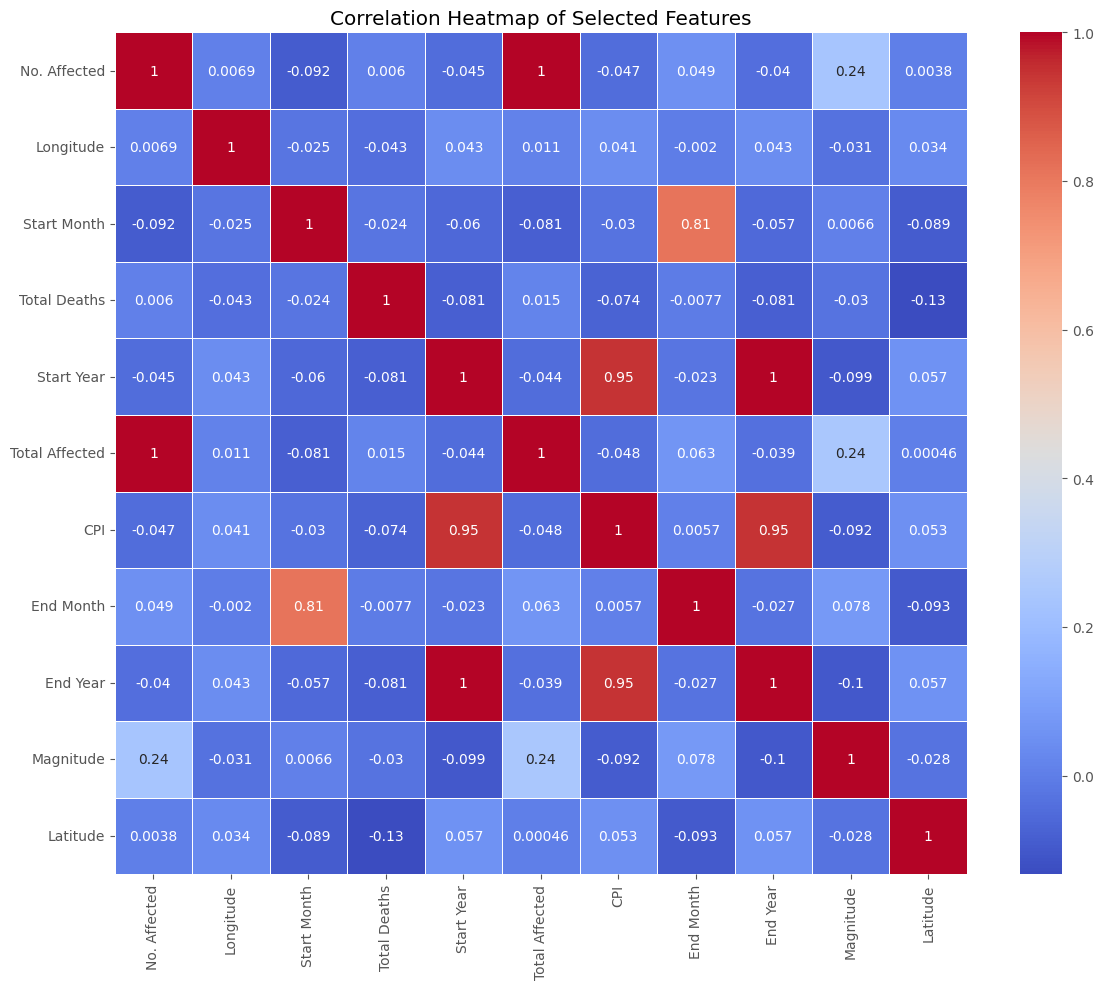

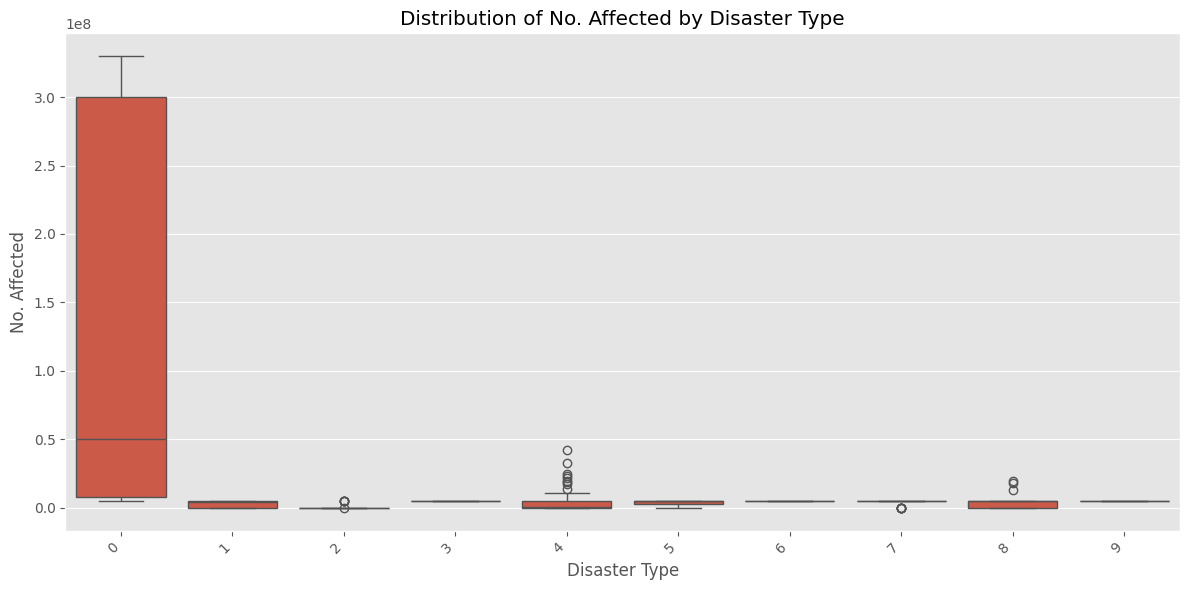

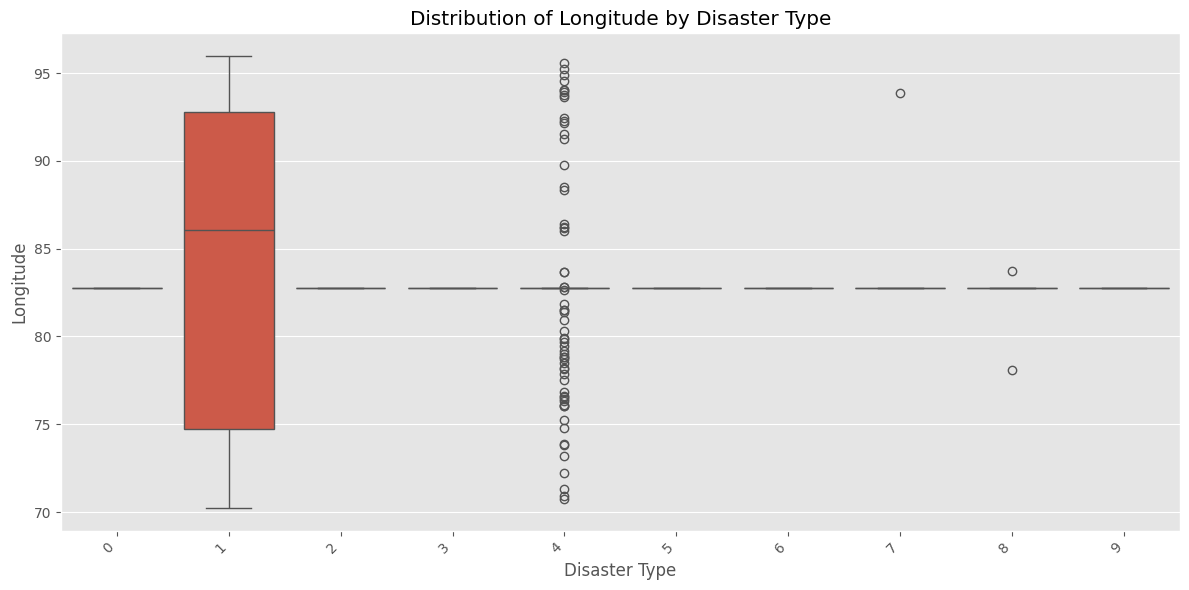

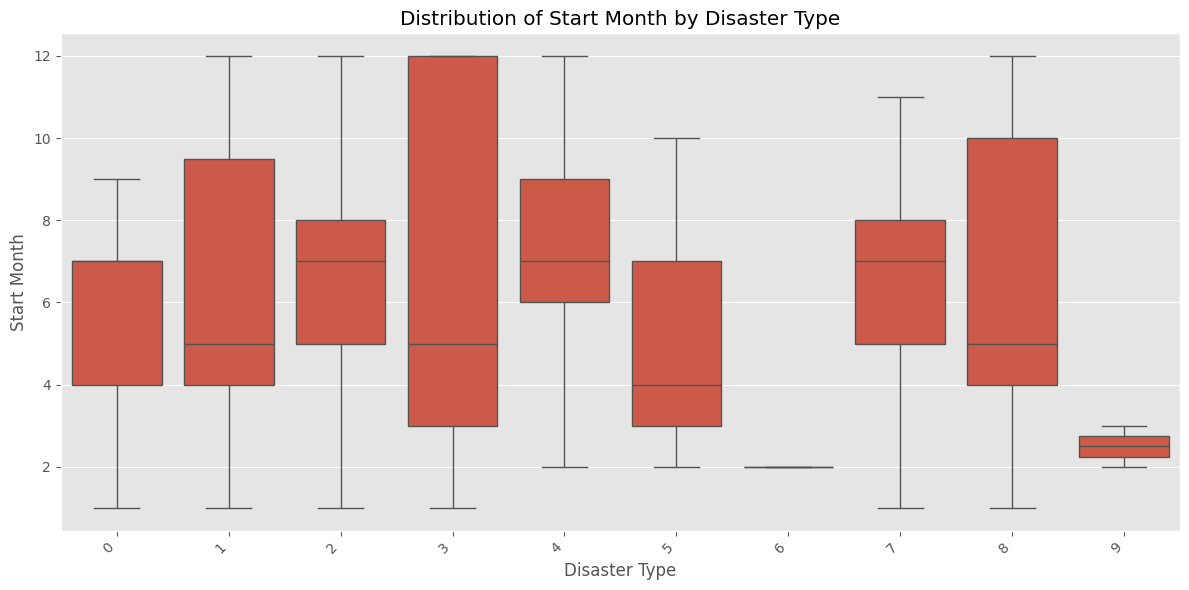

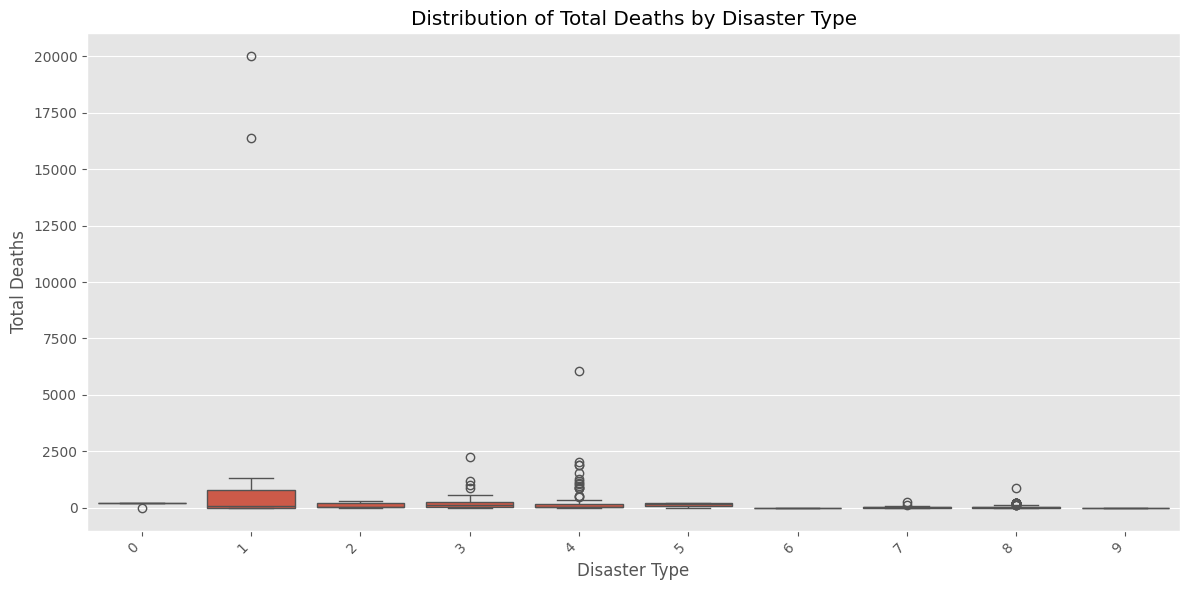

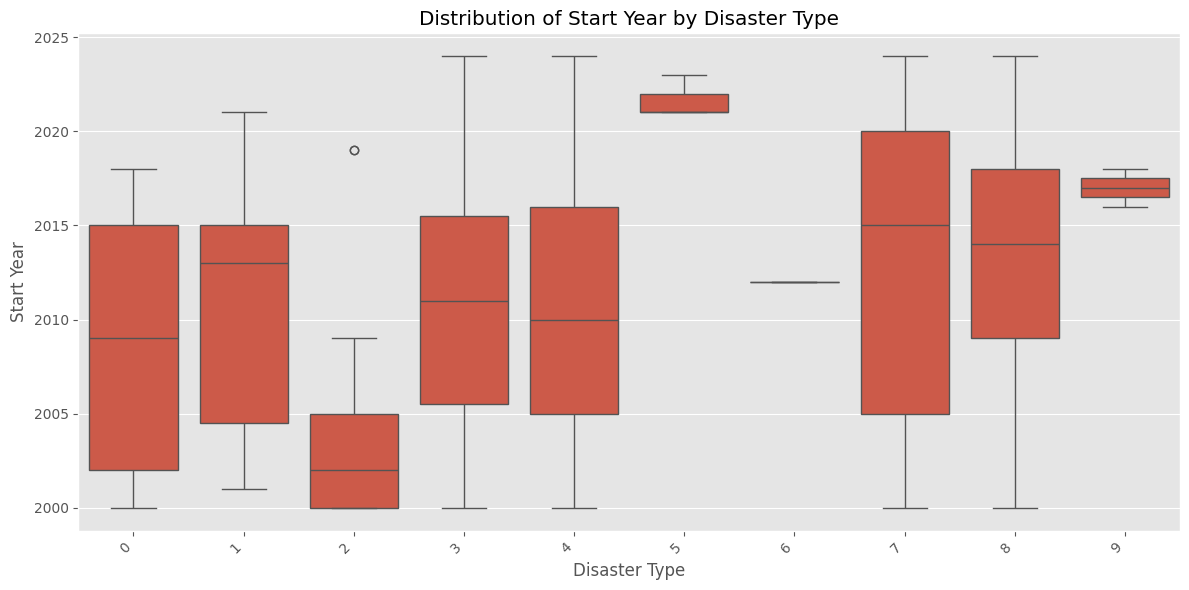

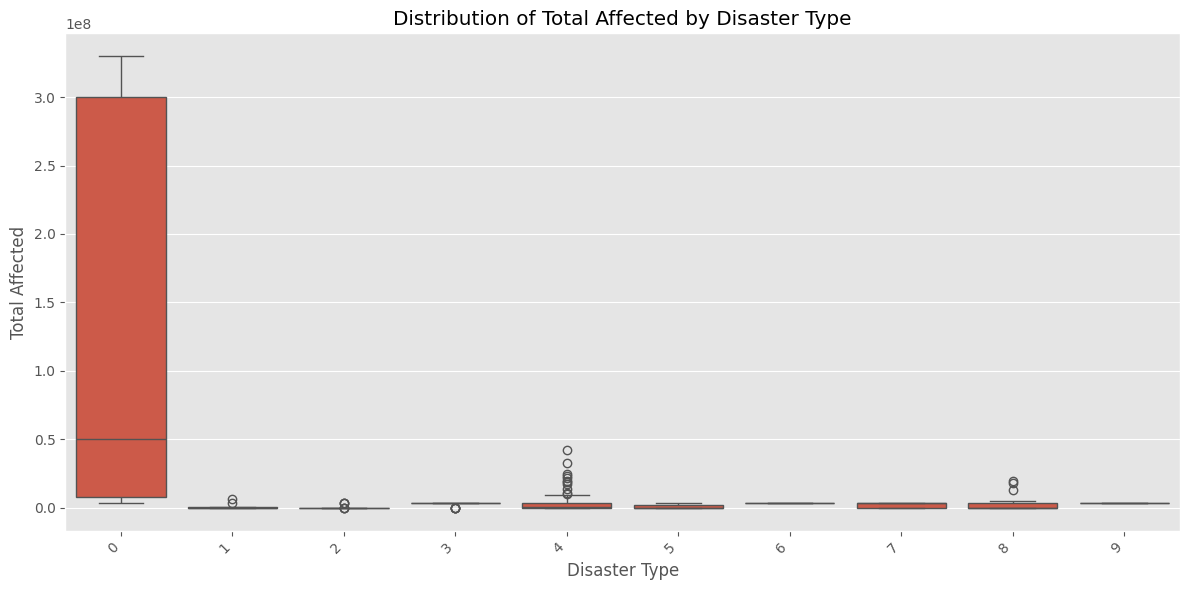

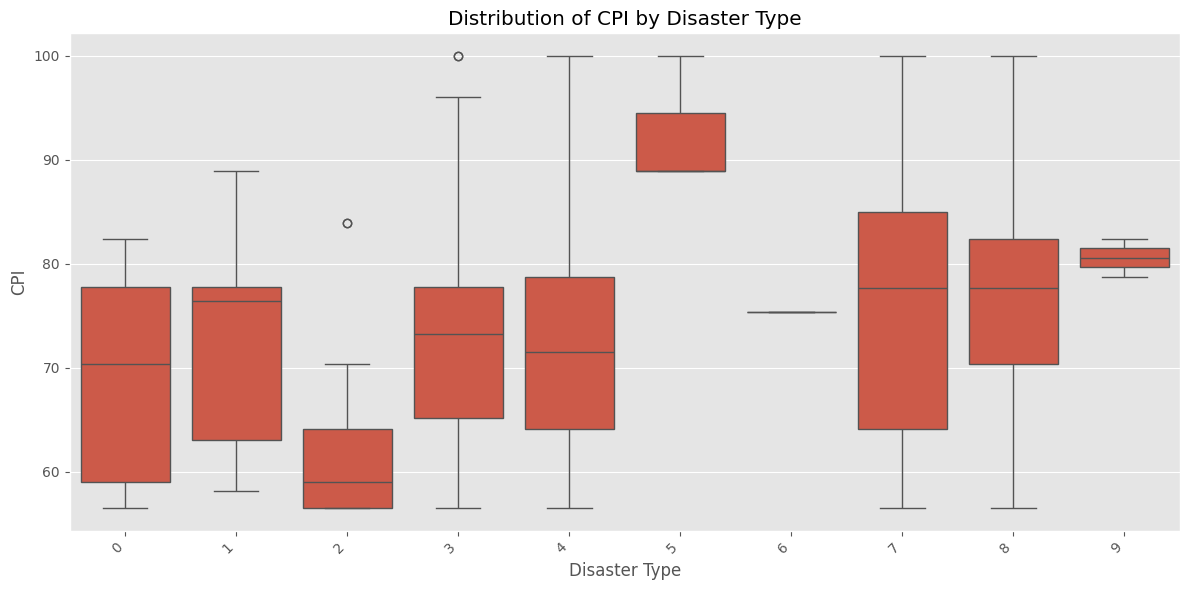

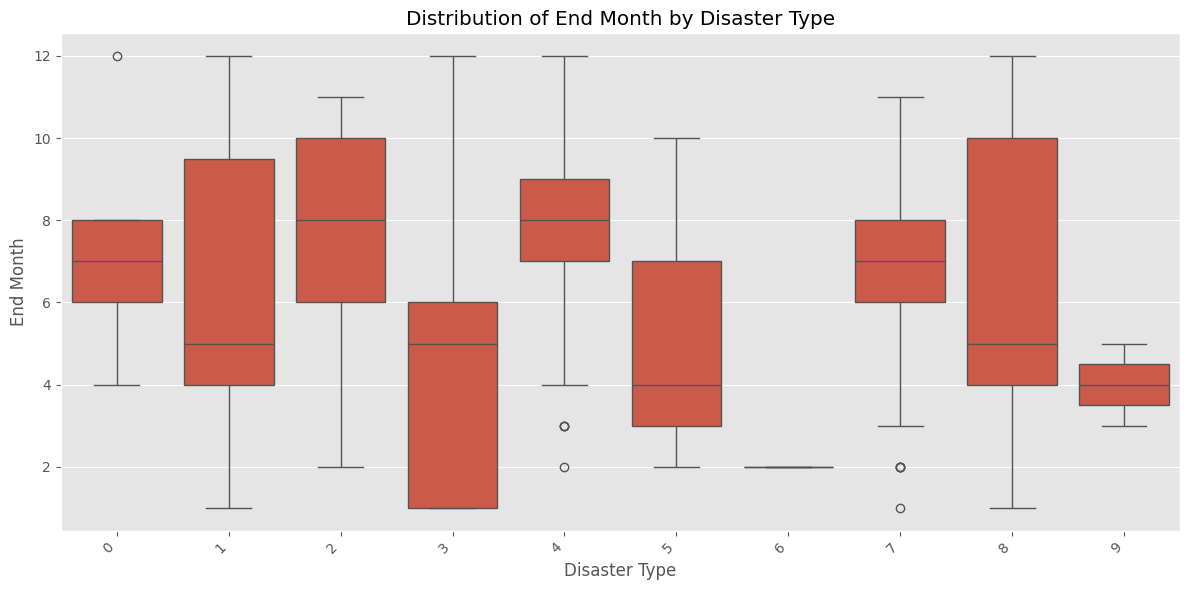

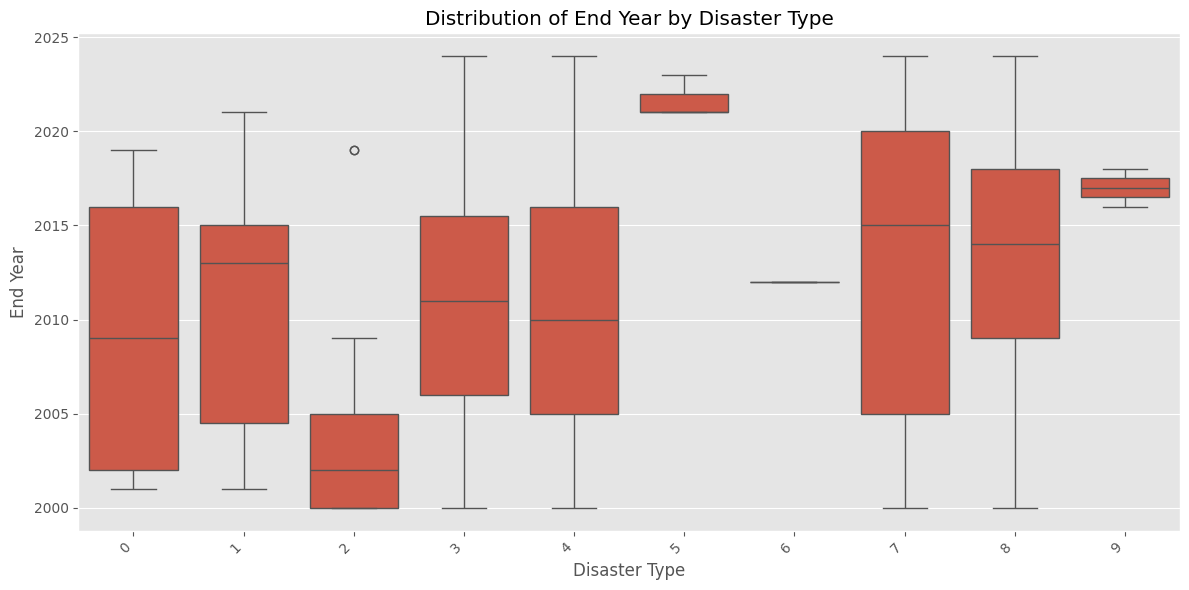

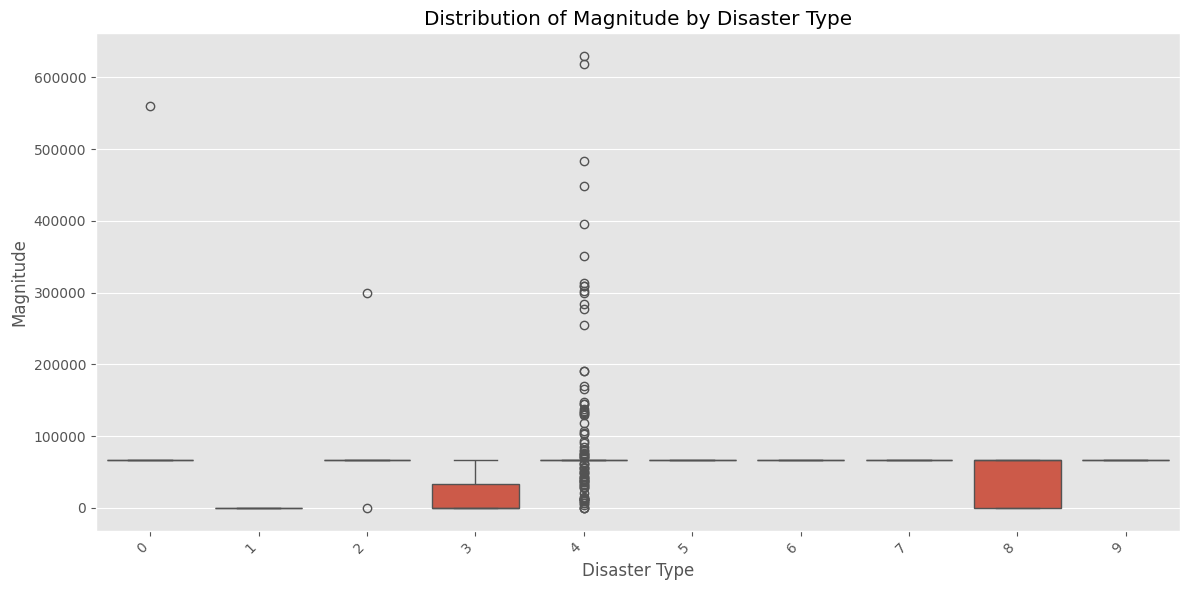

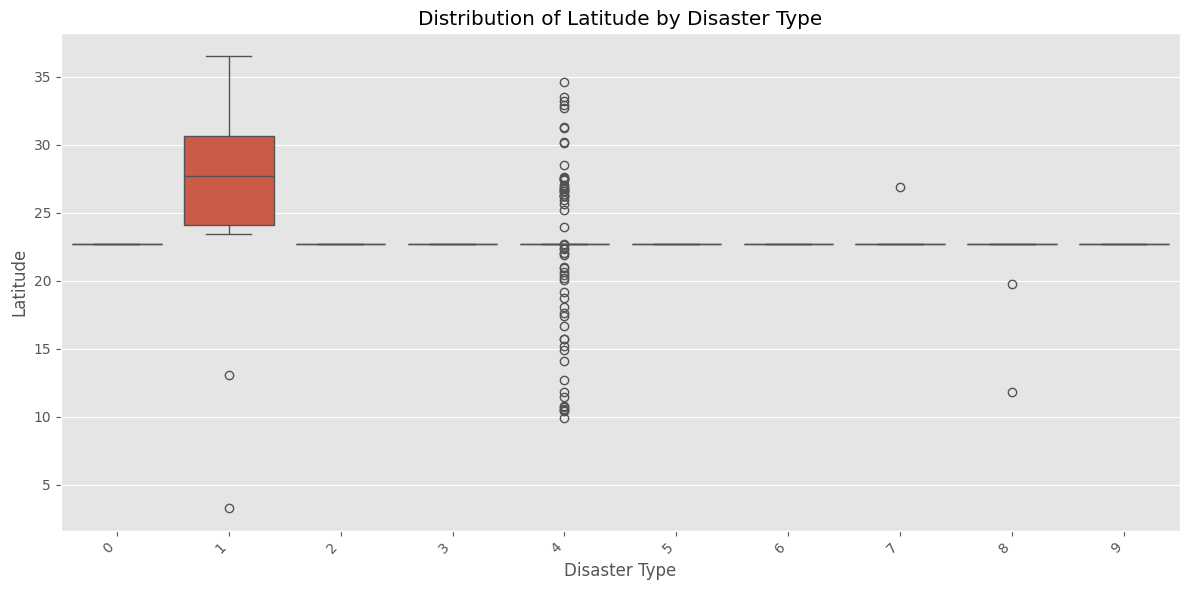

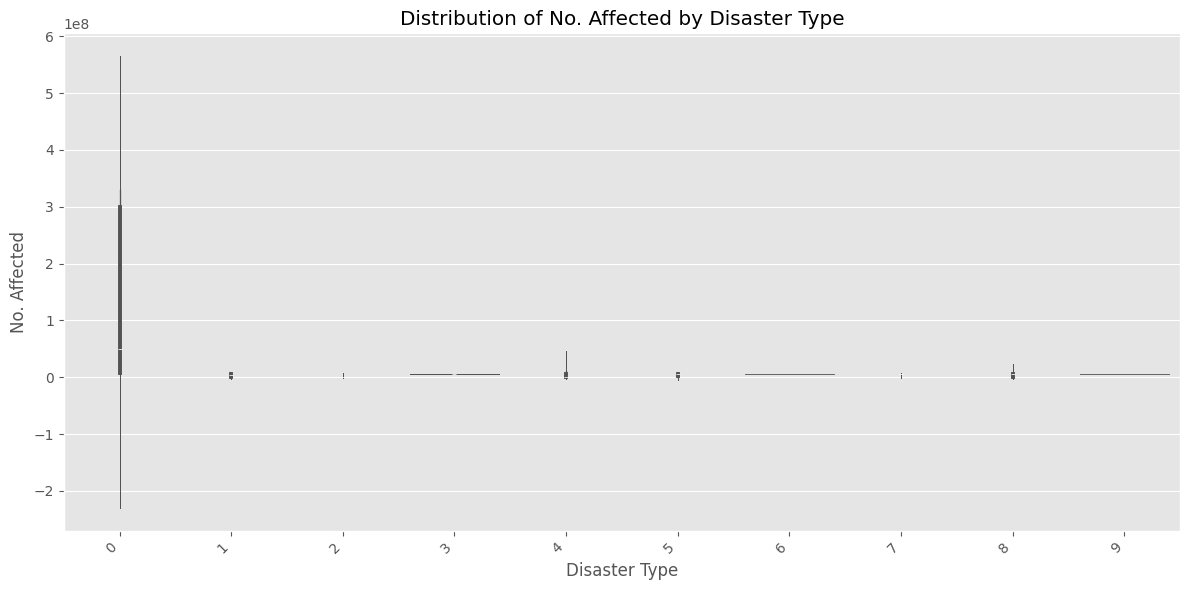

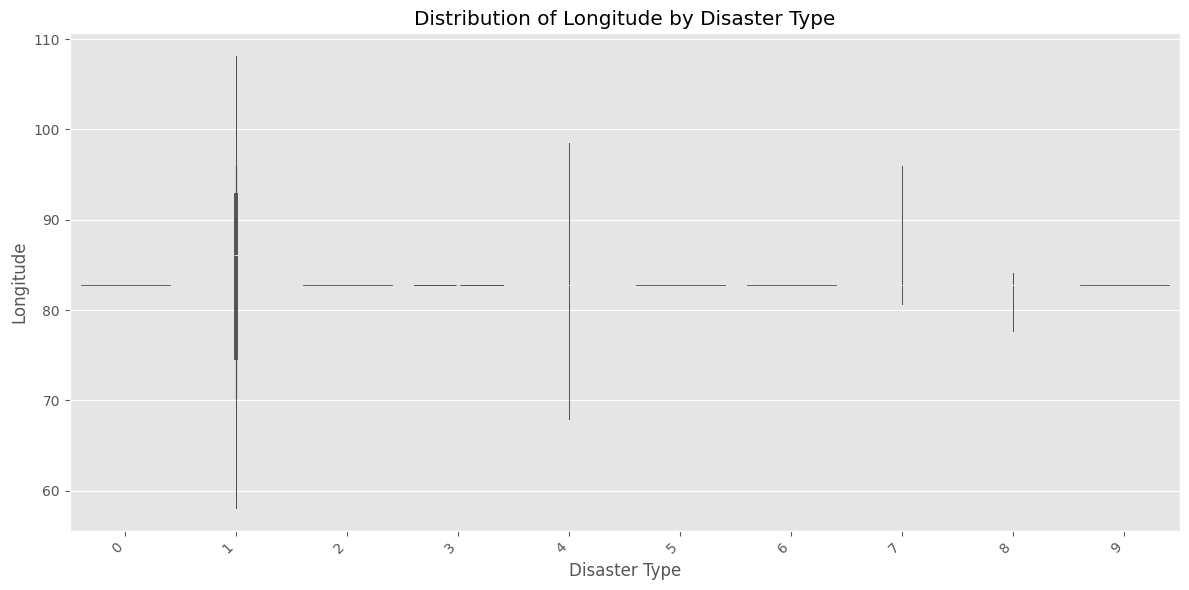

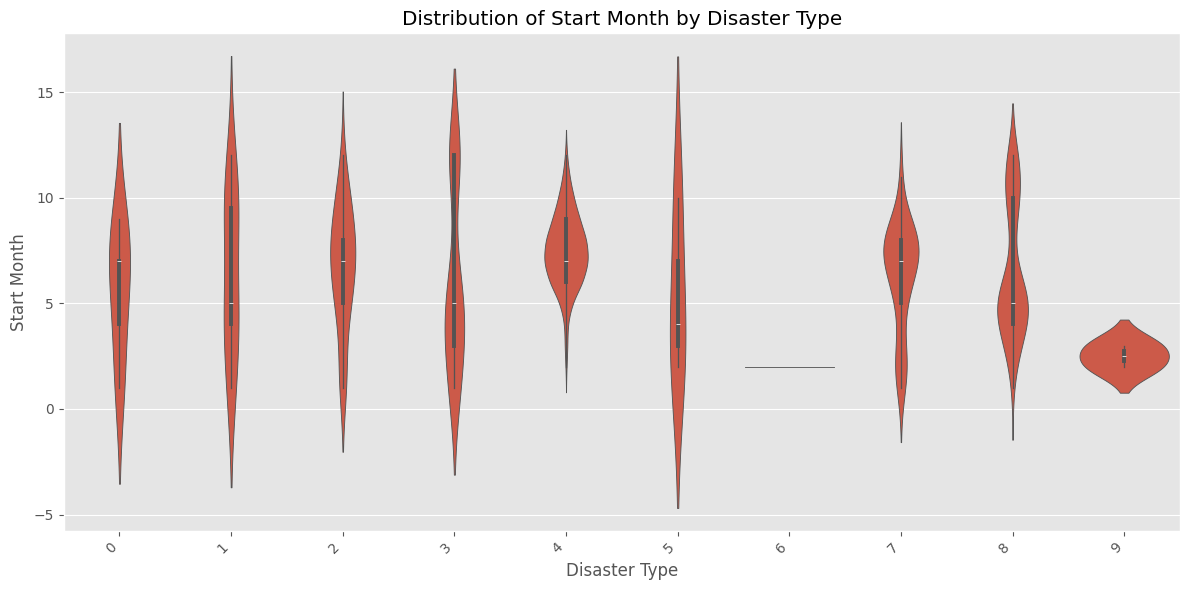

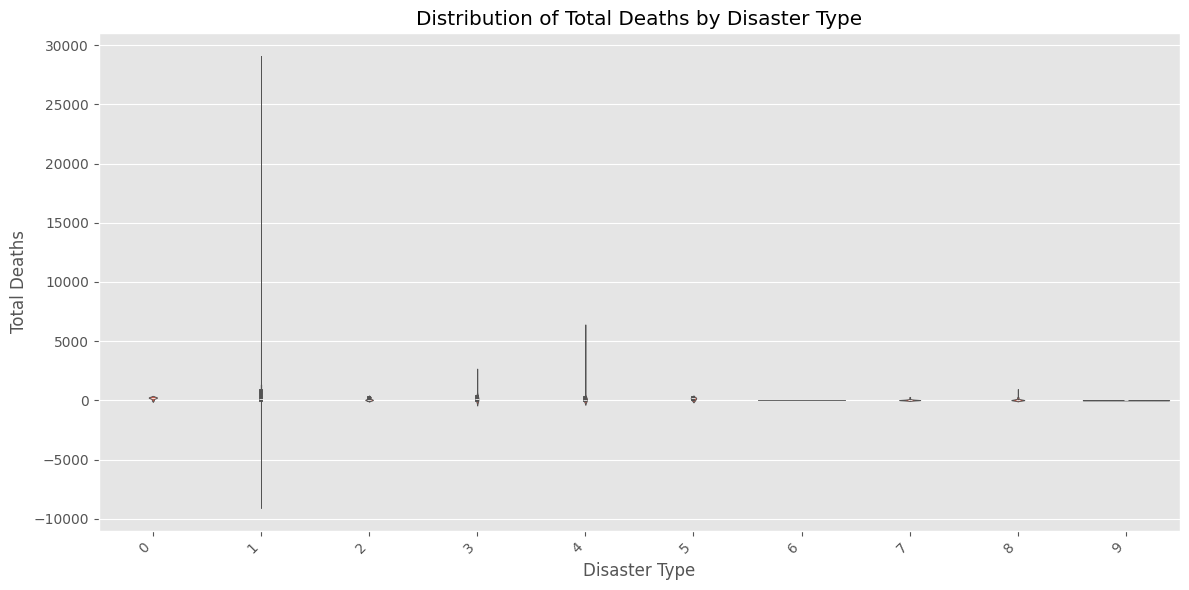

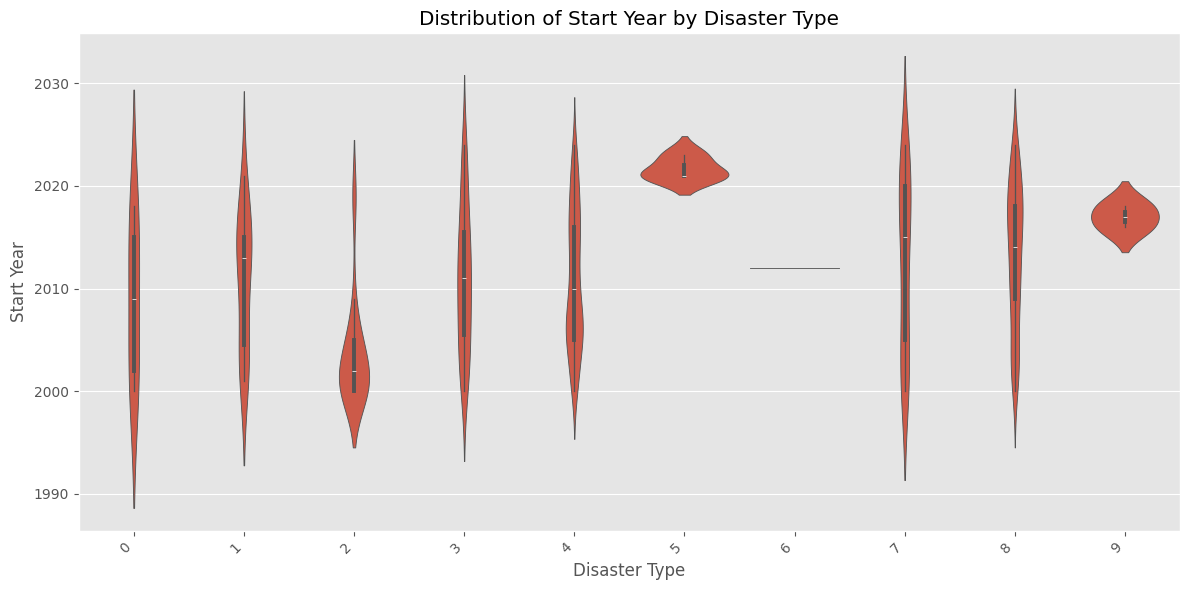

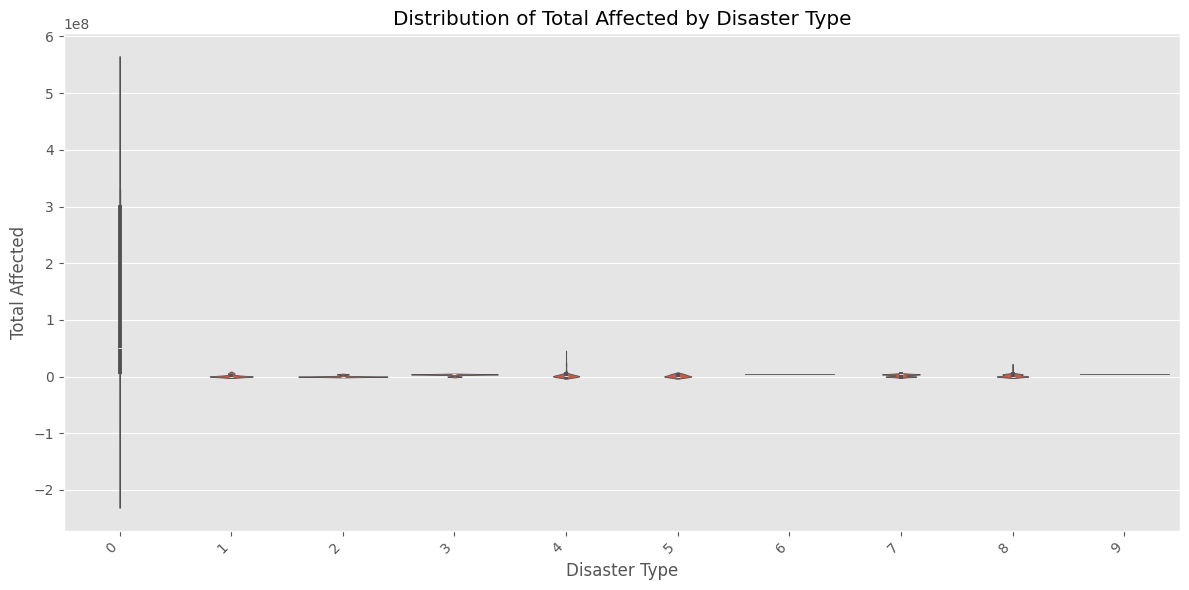

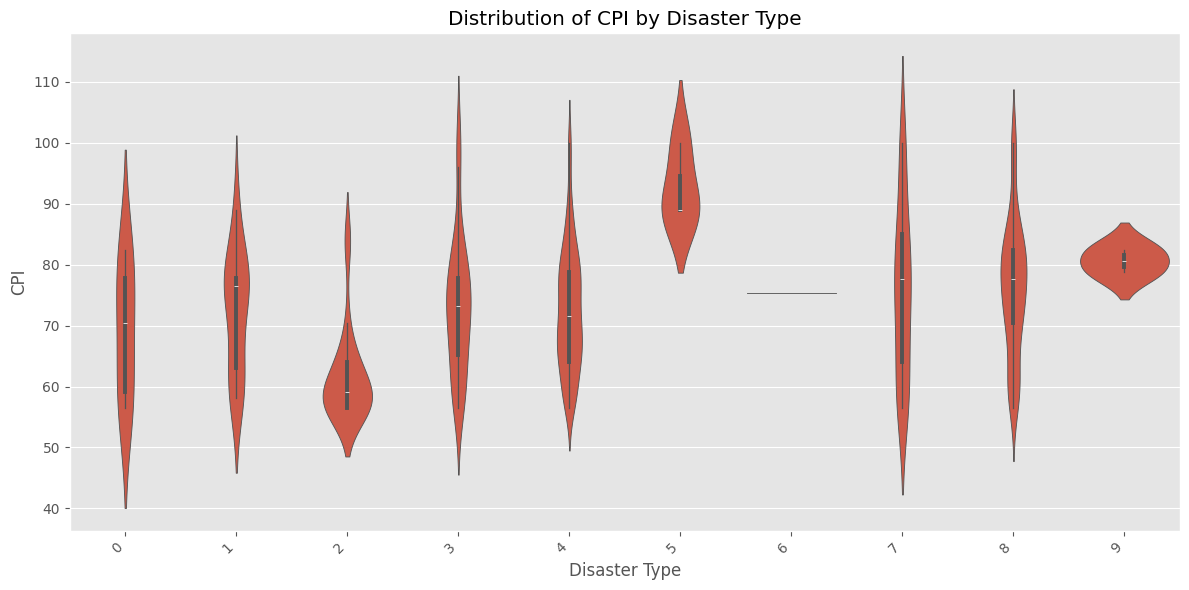

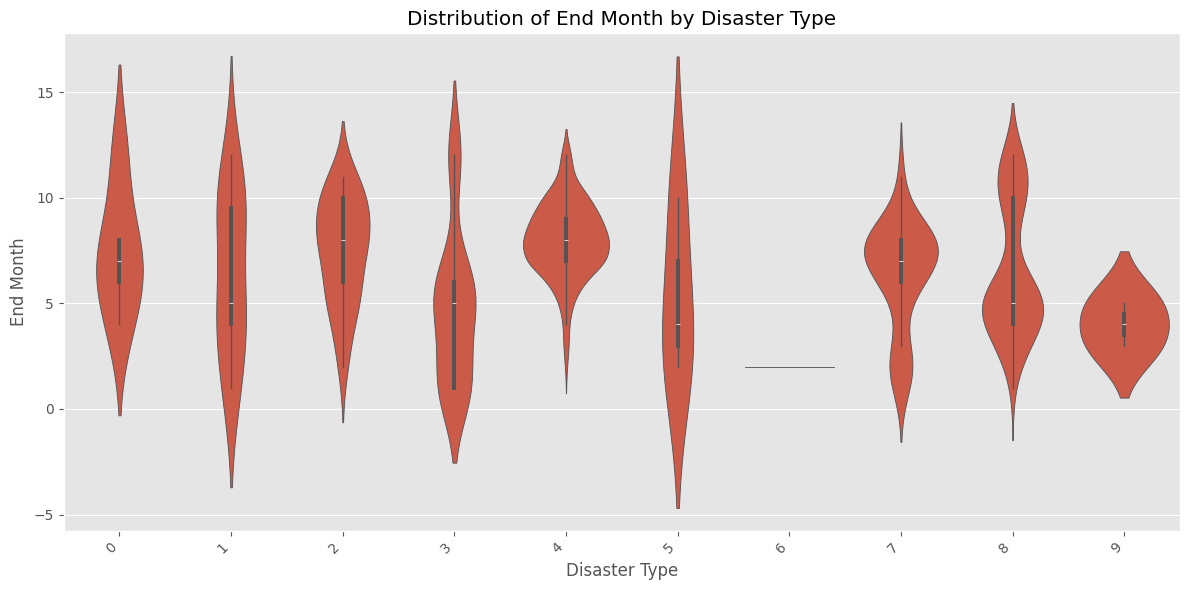

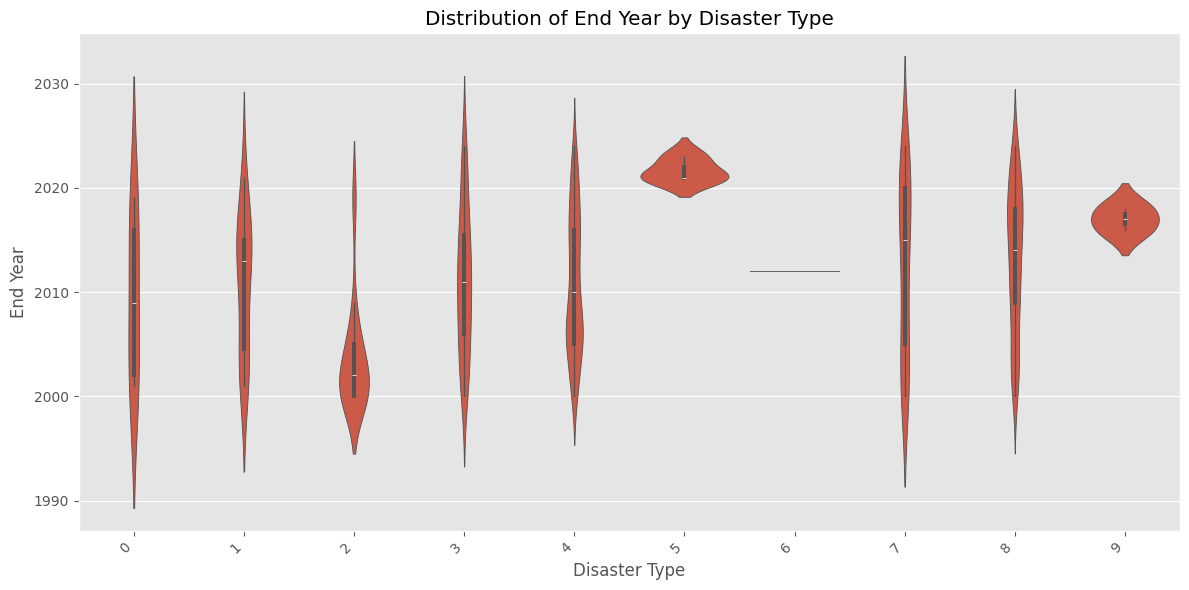

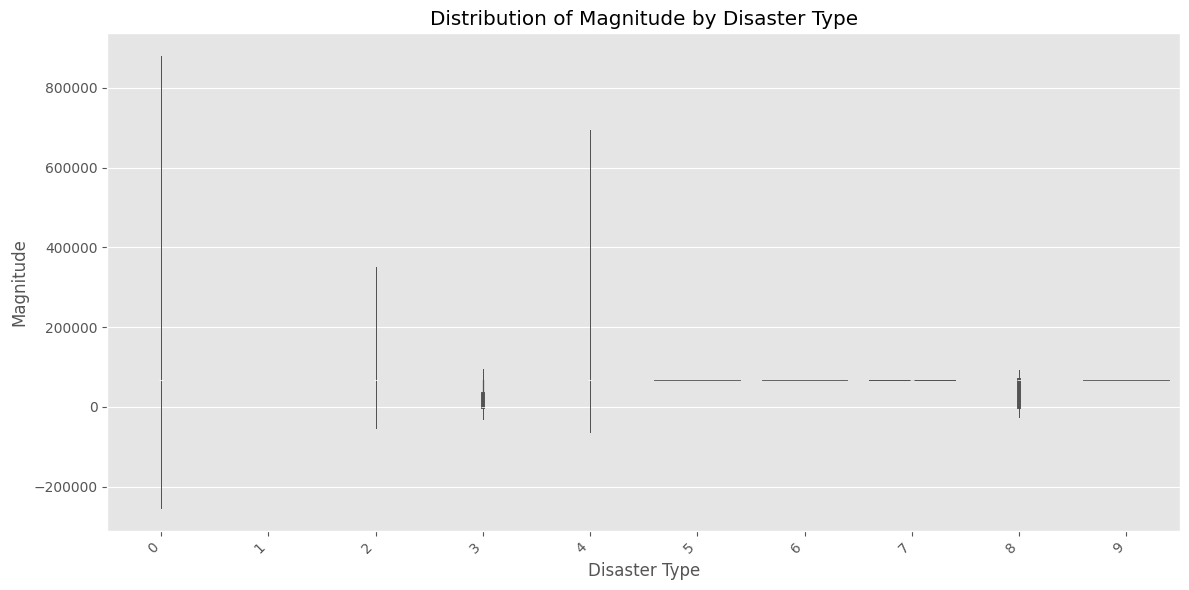

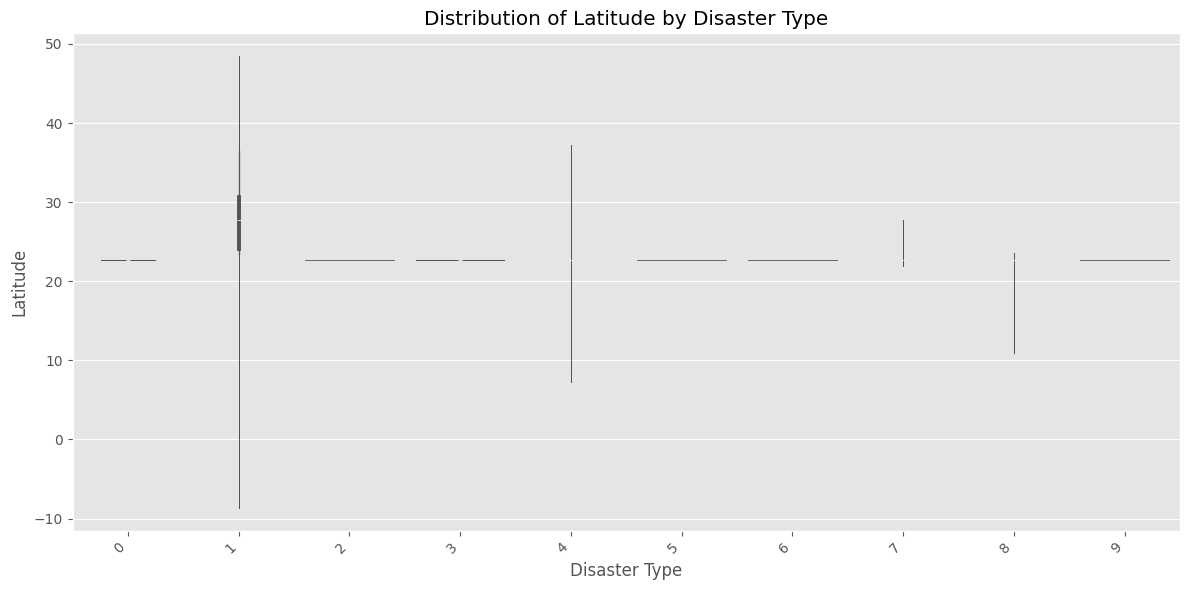

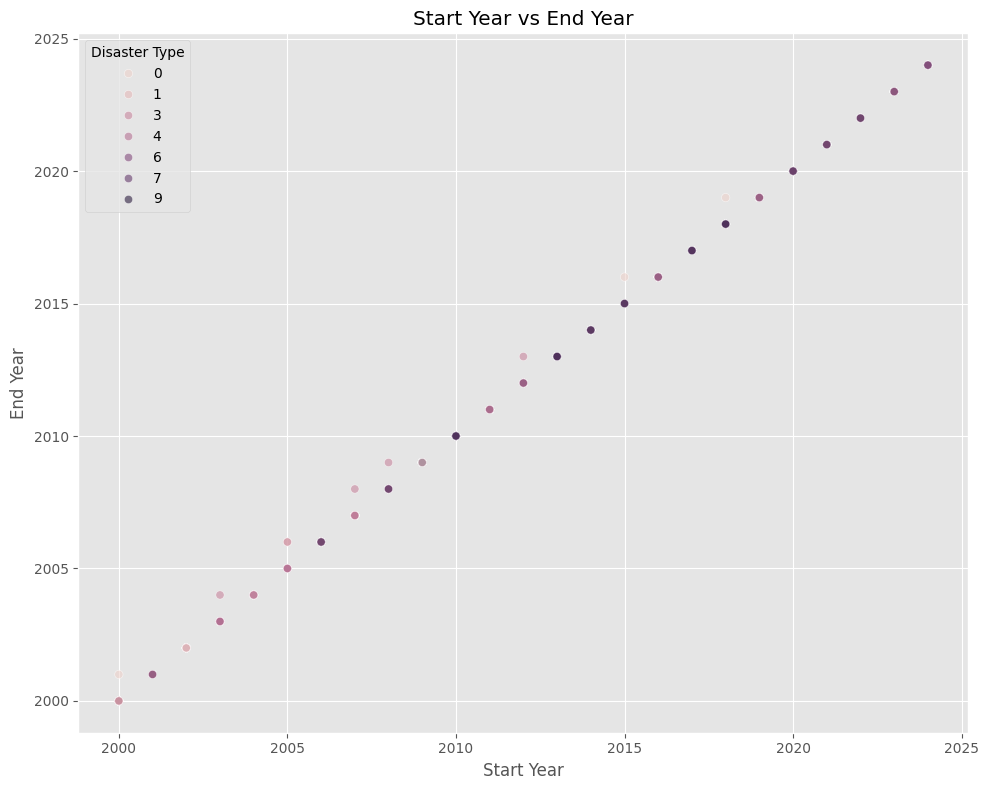

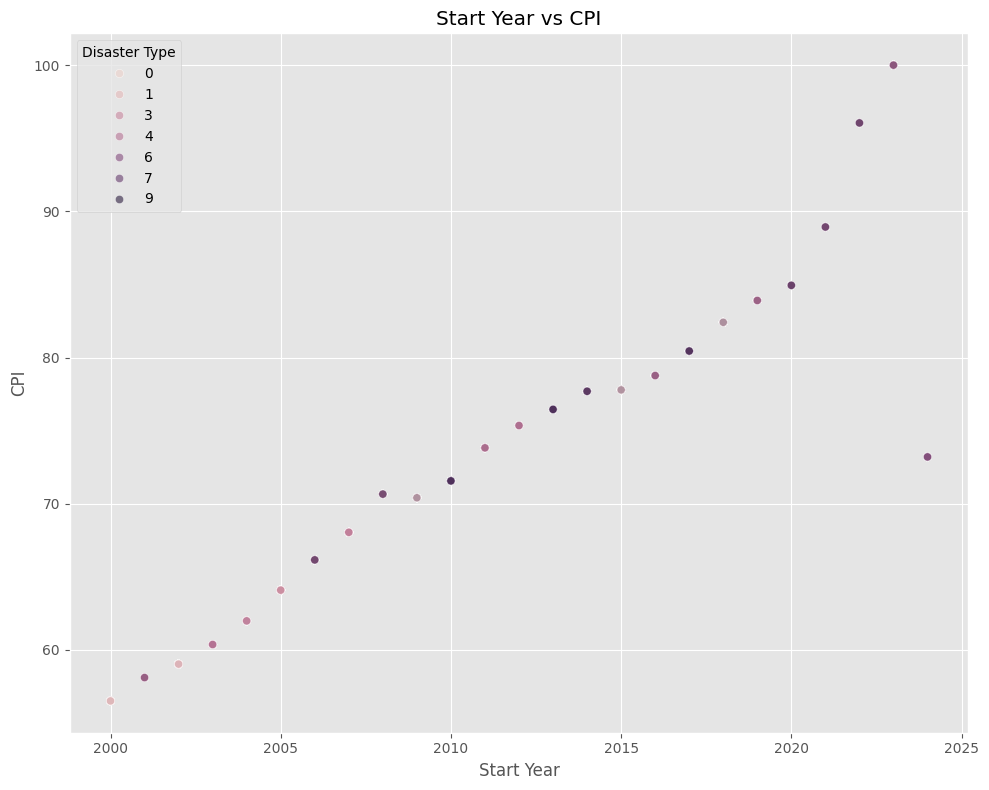

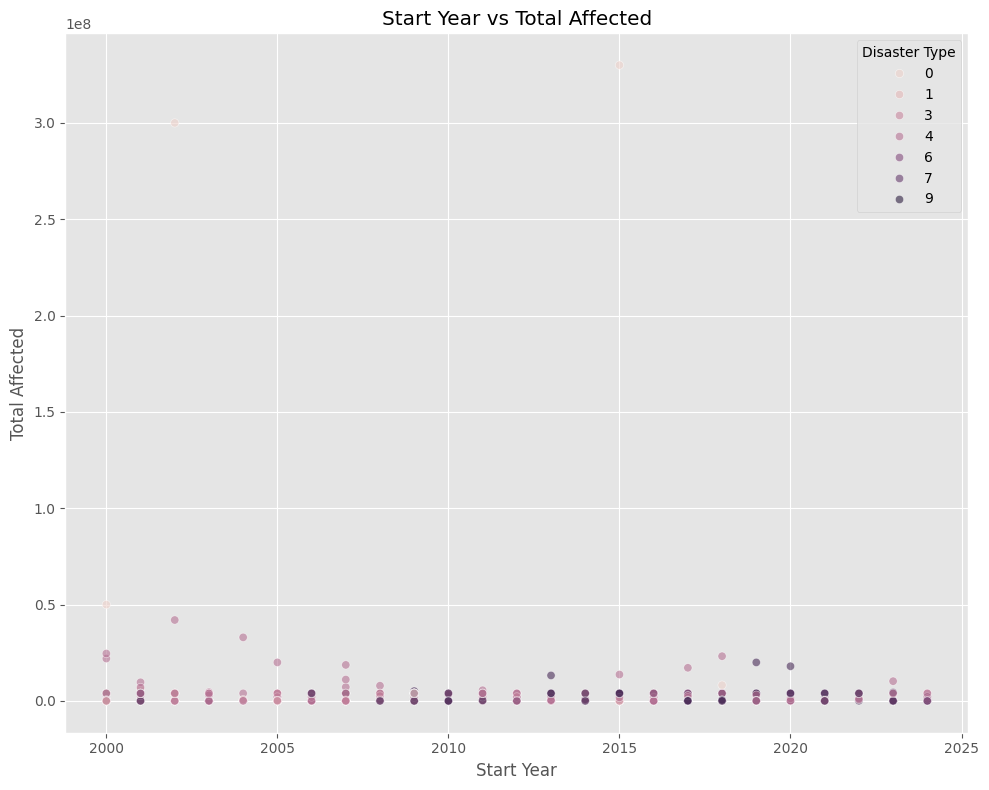

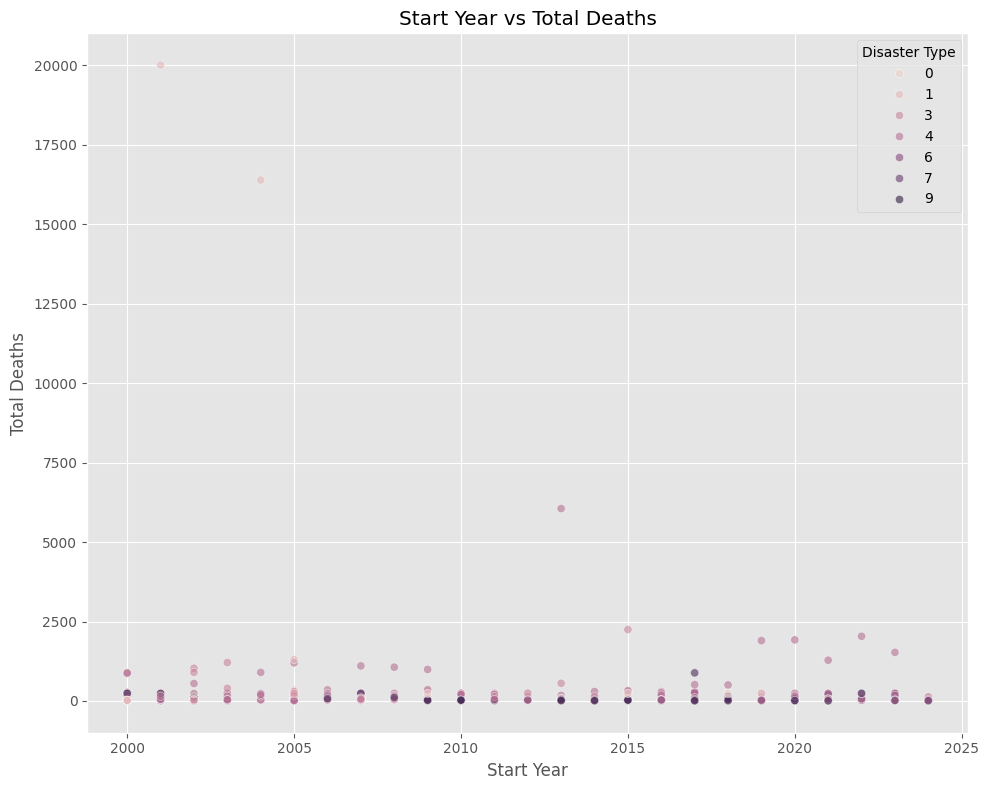

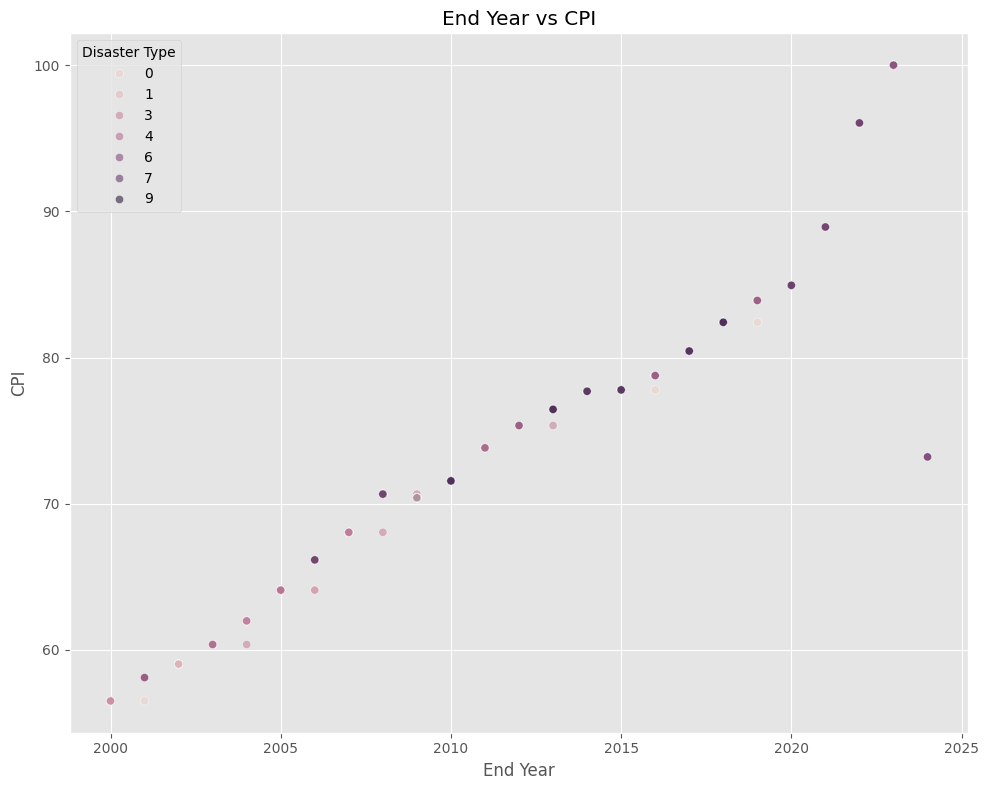

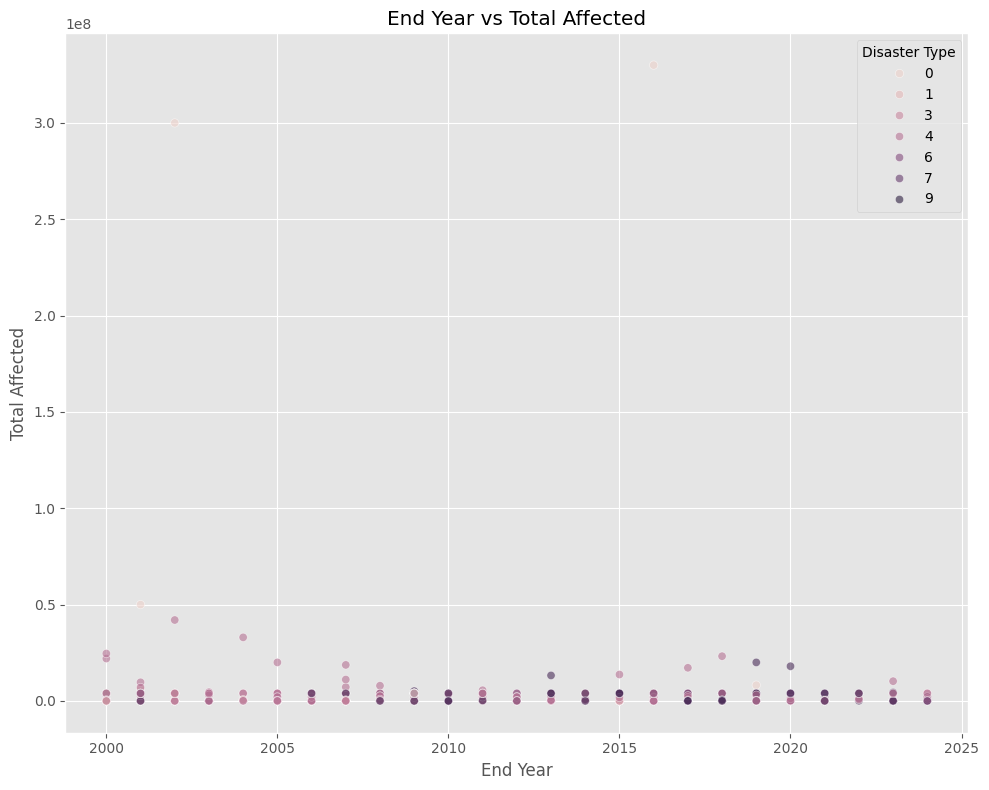

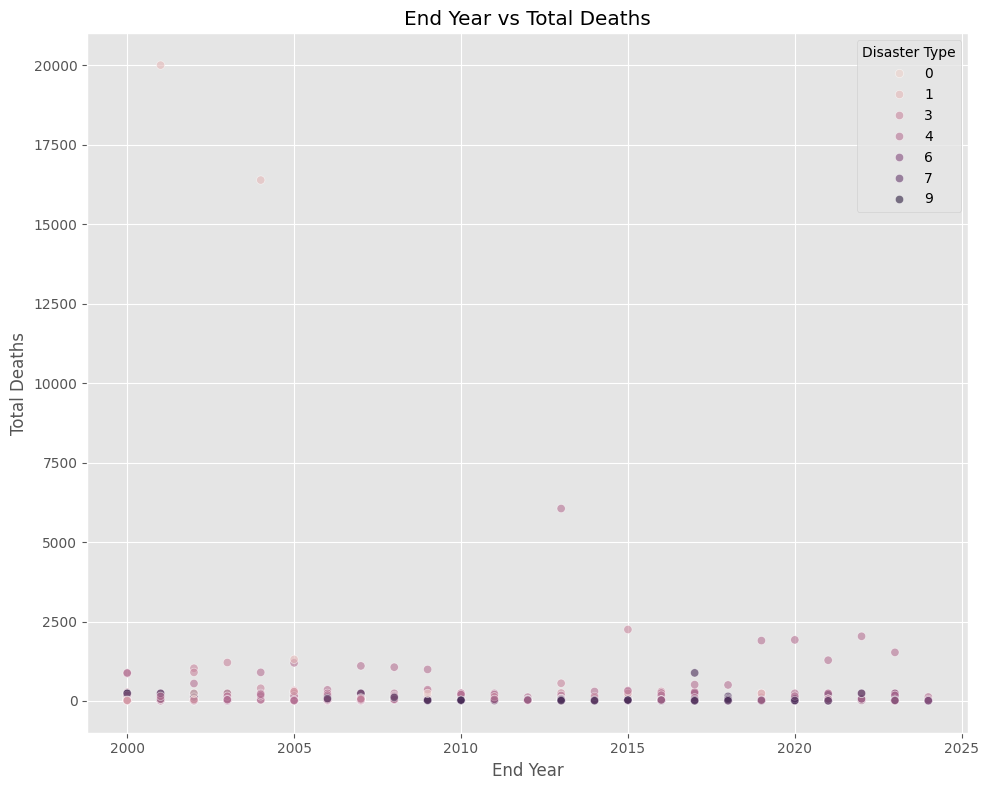

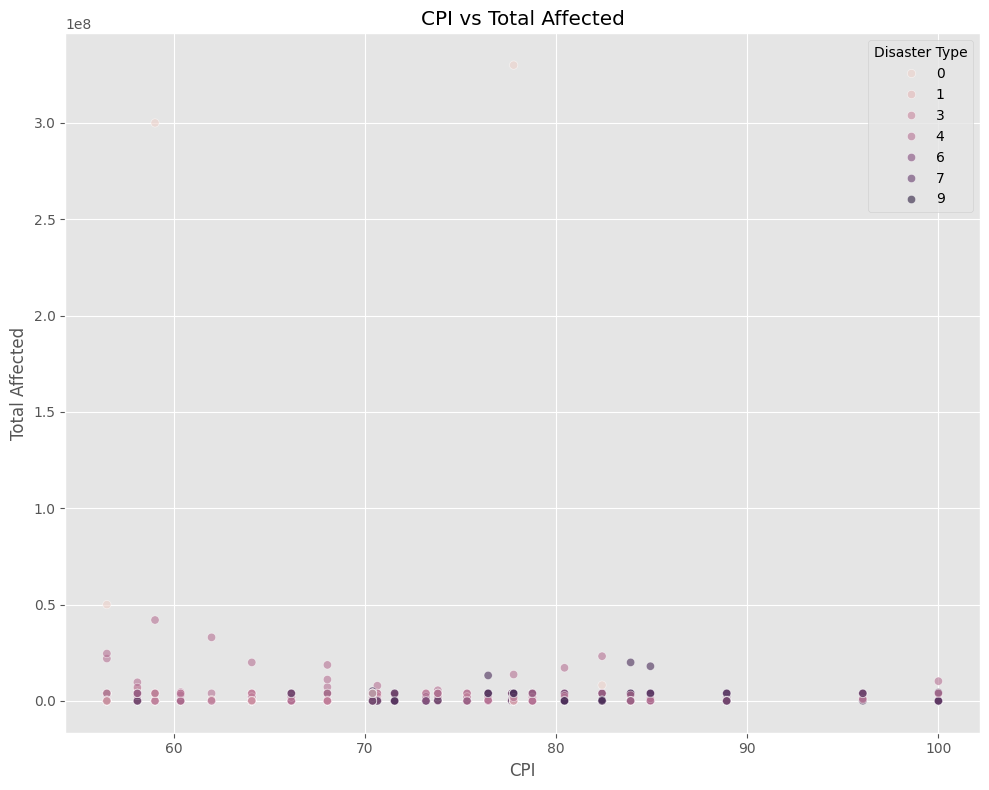

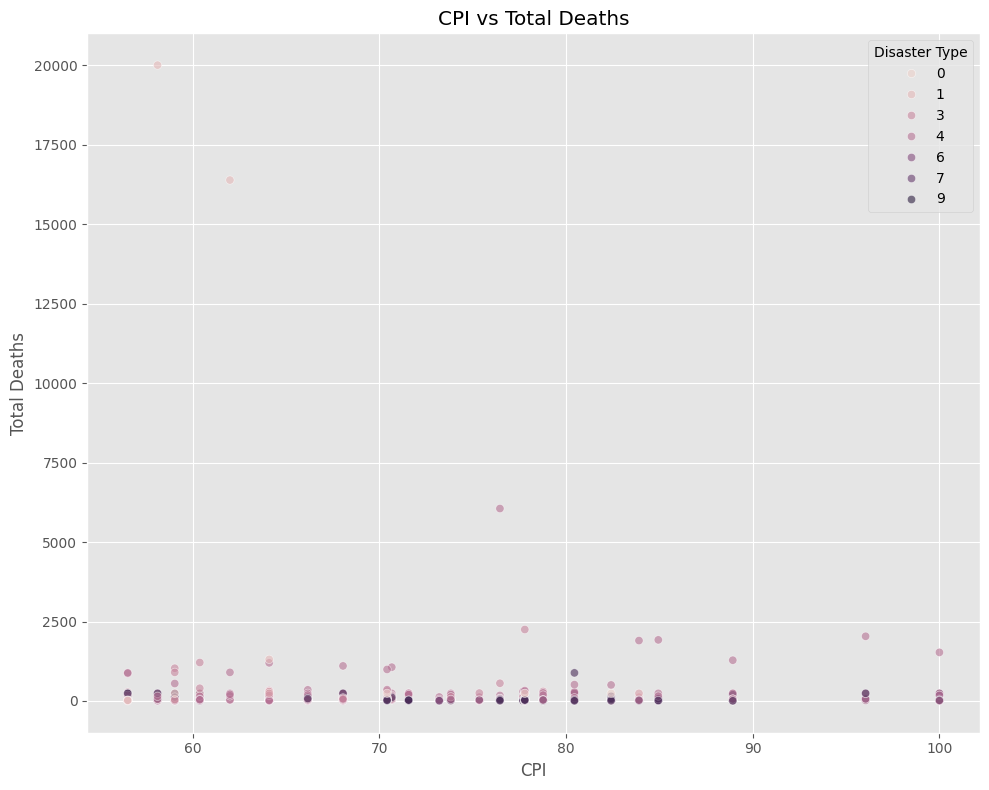

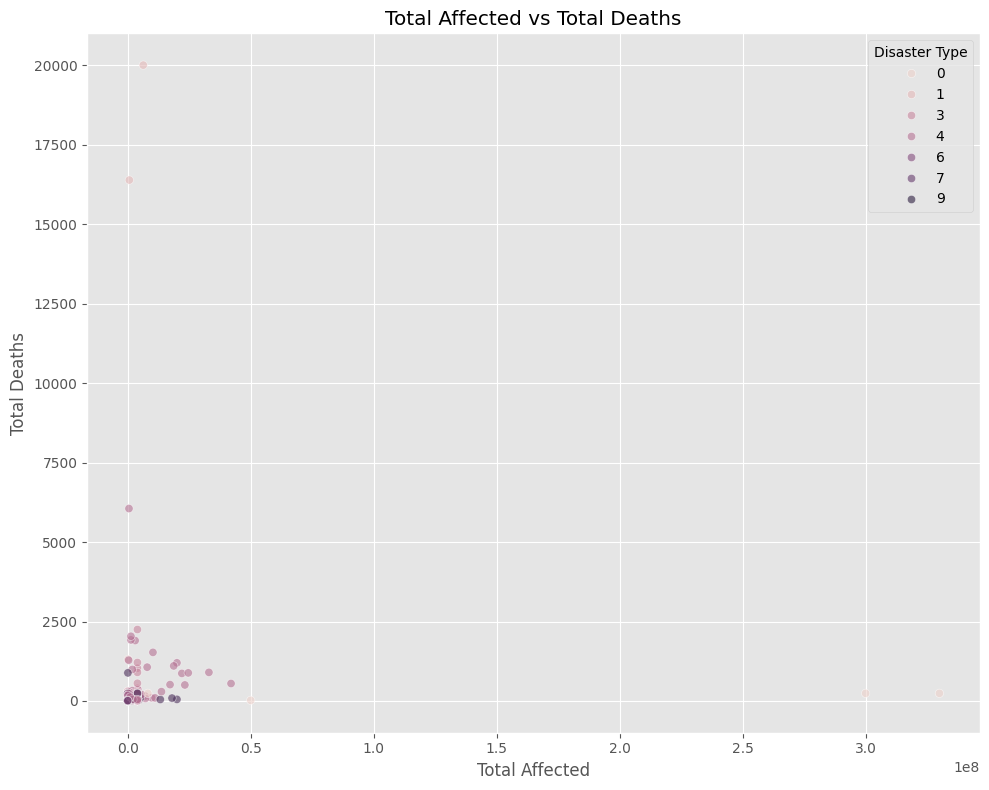

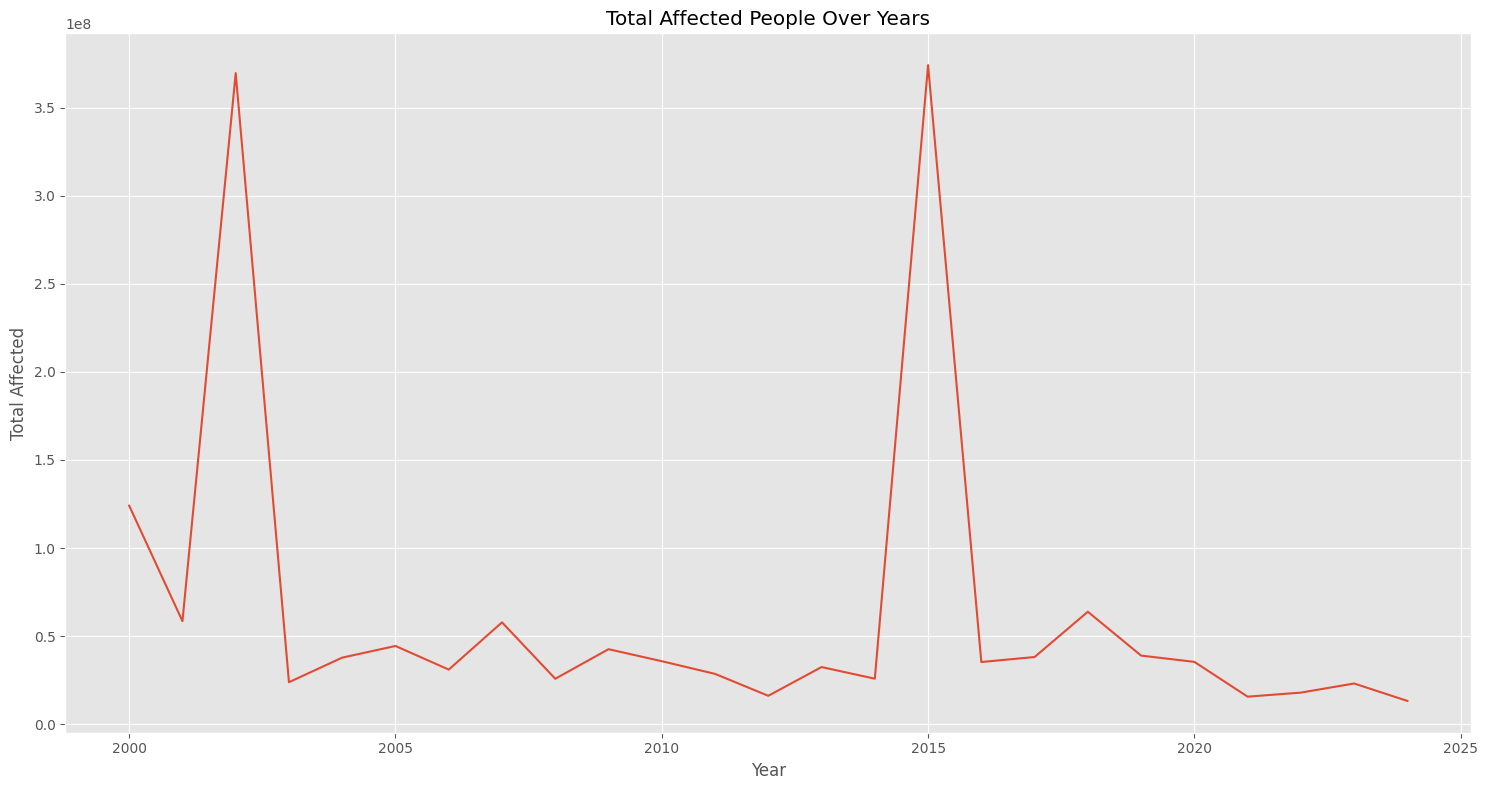

All visualizations have been displayed.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains the 'Disaster Type' column

# List of selected features
selected_features = ['No. Affected', 'Longitude', 'Start Month', 'Total Deaths', 'Start Year',
                     'Total Affected', 'CPI', 'End Month', 'End Year', 'Magnitude', 'Latitude']

# 1. Pair Plot
sns.pairplot(df[selected_features + ['Disaster Type']], hue='Disaster Type',
             plot_kws={'alpha': 0.6}, diag_kind='kde')
plt.tight_layout()
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.tight_layout()
plt.show()

# 3. Box Plots
for feature in selected_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Disaster Type', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Disaster Type')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 4. Violin Plots
for feature in selected_features:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Disaster Type', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Disaster Type')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 5. Scatter Plots (for top correlated features)
top_corr_features = ['Start Year', 'End Year', 'CPI', 'Total Affected', 'Total Deaths']
for i in range(len(top_corr_features)):
    for j in range(i+1, len(top_corr_features)):
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x=top_corr_features[i], y=top_corr_features[j],
                        hue='Disaster Type', data=df, alpha=0.6)
        plt.title(f'{top_corr_features[i]} vs {top_corr_features[j]}')
        plt.tight_layout()
        plt.show()

# 6. Time Series Plot
plt.figure(figsize=(15, 8))
df.groupby('Start Year')['Total Affected'].sum().plot(kind='line')
plt.title('Total Affected People Over Years')
plt.xlabel('Year')
plt.ylabel('Total Affected')
plt.tight_layout()
plt.show()

print("All visualizations have been displayed.")

In [6]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/FDS/1970.xlsx')
df


Date         DisNo. Historic Classification Key Disaster Group  \
0   1970-01-01  2000-0020-IND       No    nat-met-ext-col        Natural   
1   1970-01-01  2000-0306-IND       No    nat-bio-epi-vir        Natural   
2   1970-01-01  2000-0308-IND       No    nat-bio-epi-bac        Natural   
3   1970-01-01  2000-0323-IND       No    nat-met-sto-tro        Natural   
4   1970-01-01  2000-0332-IND       No    nat-hyd-flo-fla        Natural   
..         ...            ...      ...                ...            ...   
404 1970-01-01  2024-0399-IND       No    nat-hyd-flo-fla        Natural   
405 1970-01-01  2024-0481-IND       No    nat-hyd-flo-flo        Natural   
406 1970-01-01  2024-0561-IND       No    nat-hyd-flo-flo        Natural   
407 1970-01-01  2024-0624-IND       No    nat-hyd-flo-fla        Natural   
408 1970-01-01  2024-0627-IND       No    nat-hyd-mmw-lan        Natural   

    Disaster Subgroup  Disaster Type   Disaster Subtype  ISO Country  ...  \
0      Meteorological              3          Cold wave  IND   India  ...   
1          Biological              2      Viral disease  IND   India  ...   
2          Biological              2  Bacterial disease  IND   India  ...   
3      Meteorological              8   Tropical cyclone  IND   India  ...   
4        Hydrological              4        Flash flood  IND   India  ...   
..                ...            ...                ...  ...     ...  ...   
404      Hydrological              4        Flash flood  IND   India  ...   
405      Hydrological              4    Flood (General)  IND   India  ...   
406      Hydrological              4    Flood (General)  IND   India  ...   
407      Hydrological              4        Flash flood  IND   India  ...   
408      Hydrological              7    Landslide (wet)  IND   India  ...   

    End Year End Month End Day Total Deaths  No. Affected Total Affected  \
0       2000         1       1   275.000000  5.141636e+06   3.935890e+06   
1       2000         5       1    84.000000  1.055000e+03   1.055000e+03   
2       2000         5       1   240.103448  1.920000e+02   1.920000e+02   
3       2000        10      17   240.103448  5.141636e+06   3.935890e+06   
4       2000         6      10    20.000000  3.000000e+06   3.000000e+06   
..       ...       ...     ...          ...           ...            ...   
404     2024         7       8    48.000000  2.100000e+06   2.100000e+06   
405     2024         7       9   125.000000  1.000000e+06   1.000020e+06   
406     2024         8      23    46.000000  5.141636e+06   3.935890e+06   
407     2024         8      19    11.000000  3.400000e+04   3.400000e+04   
408     2024         8      22    10.000000  9.000000e+01   9.000000e+01   

           CPI                                        Admin Units  Entry Date  \
0    56.514291  [{"adm1_code":1511,"adm1_name":"West Bengal"},...  2003-07-01   
1    56.514291  [{"adm1_code":70081,"adm1_name":"Uttar Pradesh"}]  2003-07-01   
2    56.514291  [{"adm1_code":70081,"adm1_name":"Uttar Pradesh"}]  2003-07-01   
3    56.514291  [{"adm1_code":1485,"adm1_name":"Andhra Pradesh"}]  2003-07-01   
4    56.514291  [{"adm2_code":17582,"adm2_name":"Golaghat"},{"...  2005-09-15   
..         ...                                                ...         ...   
404  73.203269  [{"adm1_code":70081,"adm1_name":"Uttar Pradesh"}]  2024-06-21   
405  73.203269  [{"adm1_code":70081,"adm1_name":"Uttar Pradesh"}]  2024-07-15   
406  73.203269  [{"adm1_code":70081,"adm1_name":"Uttar Pradesh"}]  2024-08-01   
407  73.203269  [{"adm1_code":70081,"adm1_name":"Uttar Pradesh"}]  2024-08-23   
408  73.203269  [{"adm1_code":70081,"adm1_name":"Uttar Pradesh"}]  2024-08-22   

     Last Update  
0     2023-09-25  
1     2023-09-25  
2     2023-09-25  
3     2023-09-25  
4     2023-09-25  
..           ...  
404   2024-07-18  
405   2024-07-23  
406   2024-08-23  
407   2024-08-23  
408   2024-08-23  

[409 rows x 33 columns]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'Start Year' is the column with the date information
df['Date'] = pd.to_datetime(df['Start Year'])  # Convert to datetime if not already done
df.set_index('Date', inplace=True)  # Set the date as the index

# Drop rows with any null values
df_cleaned = df.dropna()

# Create a Pandas Excel writer using XlsxWriter as the engine
with pd.ExcelWriter('yearly_data.xlsx', engine='xlsxwriter') as writer:
    # Get the unique years in the cleaned dataset
    years = df_cleaned.index.year.unique()

    # Loop through each year and save to a separate sheet
    for year in years:
        yearly_data = df_cleaned[df_cleaned.index.year == year]  # Filter data for the specific year
        if not yearly_data.empty:  # Check if there is data for the year
            yearly_data.to_excel(writer, sheet_name=str(year))  # Save the DataFrame to a sheet named after the year
            print(f"Added data for {year} to the Excel file.")

print("All data has been split into separate sheets by year and saved to 'yearly_data.xlsx'.")

ModuleNotFoundError: No module named 'xlsxwriter'

In [8]:
   pip install xlsxwriter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.8 MB/s eta 0:00:00


In [9]:
   import xlsxwriter

In [10]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'Start Year' is the column with the date information
df['Date'] = pd.to_datetime(df['Start Year'])  # Convert to datetime if not already done
df.set_index('Date', inplace=True)  # Set the date as the index

# Drop rows with any null values
df_cleaned = df.dropna()

# Create a Pandas Excel writer using XlsxWriter as the engine
with pd.ExcelWriter('yearly_data.xlsx', engine='xlsxwriter') as writer:
    # Get the unique years in the cleaned dataset
    years = df_cleaned.index.year.unique()

    # Loop through each year and save to a separate sheet
    for year in years:
        yearly_data = df_cleaned[df_cleaned.index.year == year]  # Filter data for the specific year
        if not yearly_data.empty:  # Check if there is data for the year
            yearly_data.to_excel(writer, sheet_name=str(year))  # Save the DataFrame to a sheet named after the year
            print(f"Added data for {year} to the Excel file.")

print("All data has been split into separate sheets by year and saved to 'yearly_data.xlsx'.")

Added data for 1970 to the Excel file.
All data has been split into separate sheets by year and saved to 'yearly_data.xlsx'.
